In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("surface_roughnes_multi_submit_02_05_23 (3).xlsx")

In [3]:
selected_columns = ["part","x", "y", "x_y_angle", "z_angle", "sq_x", "sq_y", "sq_2d"]
df_selected = df[selected_columns]

In [4]:
df_selected.head()

,part,x,y,x_y_angle,z_angle,sq_x,sq_y,sq_2d
0,1,-75,75,0,165,0.000014,0.000011,0.000016
1,1,-75,75,0,150,0.000012,0.000011,0.000014
2,1,-75,75,0,135,0.000012,0.000011,0.000013
3,1,-75,75,0,120,0.000010,0.000010,0.000011
4,1,-75,75,0,105,0.000010,0.000009,0.000010


In [5]:
# Example of filtering, assuming 'part', 'x', 'y', and 'z_angle' columns exist
filtered_df = df[(df['part'] == 7) & 
                 (df['x'] == -75) & 
                 (df['y'] == -75) & 
                 (df['z_angle'] == 150)]

filtered_df


,Unnamed: 0,part,rib,sur,filename,x,y,x_y_angle,z_angle,sq_x,sq_y,sq_2d,NaN_total(%),NaN_std_x(%),NaN_std_y(%),param_a,param_b,param_c,length
433,434,7,1,2,STV7 Rib 1 Surf 2 subset-t.x3p,-75,-75,0,150,0.000016,0.000014,0.000019,1.492489,72.115777,173.092895,-0.000788,-6.240254e-10,-4.288418e-10,8001
442,443,7,2,2,STV7 Rib 2 Surf 2 subset-t.x3p,-75,-75,45,150,0.000013,0.000012,0.000017,0.830503,95.143639,153.622781,-0.000839,1.044286e-09,-4.182572e-10,8001
451,452,7,3,2,STV7 Rib 3 Surf 2 subset-t.x3p,-75,-75,90,150,0.000012,0.000011,0.000013,0.938414,82.875088,175.886705,-0.000776,-3.075190e-09,1.516385e-09,8001
460,461,7,4,2,STV7 Rib 4 Surf 2 subset-t.x3p,-75,-75,135,150,0.000012,0.000011,0.000014,1.316030,79.548050,143.117790,-0.000665,-2.489209e-09,1.541234e-09,8001
469,470,7,5,2,STV7 Rib 5 Surf 2 subset-t.x3p,-75,-75,180,150,0.000013,0.000012,0.000015,1.698836,70.428701,144.663726,-0.000544,-1.152294e-09,1.395644e-09,8001
478,479,7,6,2,STV7 Rib 6 Surf 2 subset-t.x3p,-75,-75,225,150,0.000014,0.000013,0.000017,1.574122,83.394609,172.707975,-0.000515,6.371974e-10,3.170745e-09,8001
487,488,7,7,2,STV7 Rib 7 Surf 2 subset-t.x3p,-75,-75,270,150,0.000018,0.000015,0.000021,2.476656,44.478541,218.228708,-0.000555,1.415231e-09,-6.265416e-10,8001
496,497,7,8,2,STV7 Rib 8 Surf 2 subset-t.x3p,-75,-75,315,150,0.000018,0.000016,0.000022,2.230274,59.039646,133.406528,-0.000689,5.470452e-10,3.194814e-10,8001


In [6]:
# row_numbers = [7,79,151,223,295,367,439,511,583]
# df_selected = df_selected.drop(row_numbers)

In [7]:
import numpy as np

# Convert angles to radians
df_selected['x_y_angle_rad'] = np.radians(df_selected['x_y_angle'])
 
# Compute sine and cosine transformations
df_selected['x_y_angle_sin'] = np.sin(df_selected['x_y_angle_rad'])
df_selected['x_y_angle_cos'] = np.cos(df_selected['x_y_angle_rad'])

# Drop the temporary radian columns
df_selected = df_selected.drop(columns=['x_y_angle_rad',"x_y_angle"])

df_selected['sq_x_mm'] = df_selected["sq_x"]*1e6
df_selected['sq_y_mm'] = df_selected["sq_y"]*1e6
df_selected['sq_2d_mm'] = df_selected["sq_2d"]*1e6

df_selected = df_selected.drop(columns=['sq_x',"sq_y",'sq_2d'])

df_selected.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1695428036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['x_y_angle_rad'] = np.radians(df_selected['x_y_angle'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1695428036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['x_y_angle_sin'] = np.sin(df_selected['x_y_angle_rad'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1695428036.py:8: SettingWithCopyWarning: 
A value is tr

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm
0,1,-75,75,165,0.0,1.0,14.303308,11.139786,16.331449
1,1,-75,75,150,0.0,1.0,11.925943,10.973038,13.834006
2,1,-75,75,135,0.0,1.0,11.950379,11.458671,13.309392
3,1,-75,75,120,0.0,1.0,10.053210,9.503831,10.536805
4,1,-75,75,105,0.0,1.0,10.007268,9.359134,10.356003


In [8]:
df_selected.describe()

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm
count,648.000000,648.000000,648.000000,648.000000,6.480000e+02,6.480000e+02,648.000000,648.000000,648.000000
mean,5.000000,0.000000,0.000000,105.000000,0.000000e+00,-3.837808e-17,18.567347,17.100590,20.449874
std,2.583983,61.284549,61.284549,38.759752,7.076530e-01,7.076530e-01,13.671209,12.982955,14.053767
min,1.000000,-75.000000,-75.000000,45.000000,-1.000000e+00,-1.000000e+00,7.179803,6.774119,7.458894
25%,3.000000,-75.000000,-75.000000,75.000000,-7.071068e-01,-7.071068e-01,9.803739,9.190887,10.983006
50%,5.000000,0.000000,0.000000,105.000000,6.123234e-17,-6.123234e-17,12.013556,10.910919,14.144834
75%,7.000000,75.000000,75.000000,135.000000,7.071068e-01,7.071068e-01,16.737747,14.509984,20.019012
max,9.000000,75.000000,75.000000,165.000000,1.000000e+00,1.000000e+00,59.955269,51.371050,64.209880


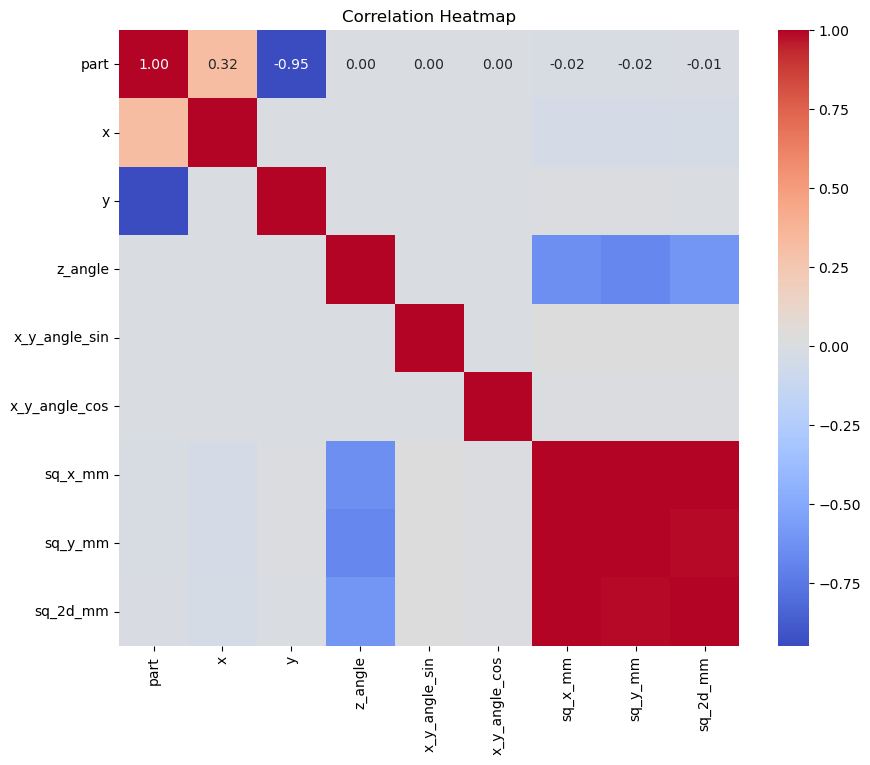

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the Pearson correlation coefficients
correlation_matrix = df_selected.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# sq_x_mm

# linear regression and gradient boosting regressor

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the sample data
# Split data into training and testing sets
X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_x_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(98.25944063682302, 0.2550171621665559)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor
gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test)

# Calculate mean squared error and R^2 score for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(3.962947557573546, 0.9699537479707587)

# with cross validation

In [12]:
from sklearn.model_selection import cross_val_score, KFold

# Assuming df_selected is available, if not we'll need to recreate it
# For this demonstration, I will generate a sample dataframe as df_selected is not provided
import numpy as np

np.random.seed(42)
sample_size = 100

X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_x_mm']


model = LinearRegression()

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute cross-validated MSE and R^2 score
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()

mse_mean, mse_std, r2_mean, r2_std


(112.5166585993358, 13.640560249689335, 0.3478871831537077, 0.1411834543457889)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Compute cross-validated MSE and R^2 score for Gradient Boosting Regressor
mse_scores_gbr = -cross_val_score(gbr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_gbr = cross_val_score(gbr_model, X, y, cv=kf, scoring='r2')

mse_mean_gbr, mse_std_gbr = mse_scores_gbr.mean(), mse_scores_gbr.std()
r2_mean_gbr, r2_std_gbr = r2_scores_gbr.mean(), r2_scores_gbr.std()

mse_mean_gbr, mse_std_gbr, r2_mean_gbr, r2_std_gbr


(5.4671005179646555,
 2.48144875110263,
 0.9700714436545959,
 0.008958131229196786)

In [14]:
gbr_model.fit(X, y)


GradientBoostingRegressor(random_state=42)

In [15]:
new_data = pd.DataFrame([{
    'part': 1,
    'x': 75,
    'y': 75,
    'x_y_angle_sin': 0.6,
    'x_y_angle_cos': 0.5,
    'z_angle': 60
}])

# Use the trained model to make predictions on new data
predictions = gbr_model.predict(new_data)

# Print the predictions
print(predictions)


[41.53768088]


# sq_y_mm

# linear regression and gradient boosting regressor

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the sample data
# Split data into training and testing sets
X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_y_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(82.11448556885493, 0.29313717313447174)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor
gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test)

# Calculate mean squared error and R^2 score for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(3.3214015800288026, 0.9714085122283799)

# with cross validation

In [18]:
from sklearn.model_selection import cross_val_score, KFold

# Assuming df_selected is available, if not we'll need to recreate it
# For this demonstration, I will generate a sample dataframe as df_selected is not provided
import numpy as np

np.random.seed(42)
sample_size = 100

X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_y_mm']


model = LinearRegression()

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute cross-validated MSE and R^2 score
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()

mse_mean, mse_std, r2_mean, r2_std


(93.28165132112329,
 10.030955783366707,
 0.39930319396692276,
 0.13184189335747756)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Compute cross-validated MSE and R^2 score for Gradient Boosting Regressor
mse_scores_gbr = -cross_val_score(gbr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_gbr = cross_val_score(gbr_model, X, y, cv=kf, scoring='r2')

mse_mean_gbr, mse_std_gbr = mse_scores_gbr.mean(), mse_scores_gbr.std()
r2_mean_gbr, r2_std_gbr = r2_scores_gbr.mean(), r2_scores_gbr.std()

mse_mean_gbr, mse_std_gbr, r2_mean_gbr, r2_std_gbr


(4.464543215819423,
 1.7463344290381386,
 0.9726119467996653,
 0.007086814698338838)

# sq_2d_mm

# linear regression and gradient boosting regressor

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the sample data
# Split data into training and testing sets
X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_2d_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(113.43005928275488, 0.20349489666693676)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor
gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test)

# Calculate mean squared error and R^2 score for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(4.308228062585821, 0.9697476519022323)

# with cross validation

In [22]:
from sklearn.model_selection import cross_val_score, KFold

# Assuming df_selected is available, if not we'll need to recreate it
# For this demonstration, I will generate a sample dataframe as df_selected is not provided
import numpy as np

np.random.seed(42)
sample_size = 100

X = df_selected[['part','x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_2d_mm']


model = LinearRegression()

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute cross-validated MSE and R^2 score
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()

mse_mean, mse_std, r2_mean, r2_std


(128.60590802848918,
 14.433044320293275,
 0.29752757430995047,
 0.14363206369769724)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Compute cross-validated MSE and R^2 score for Gradient Boosting Regressor
mse_scores_gbr = -cross_val_score(gbr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_gbr = cross_val_score(gbr_model, X, y, cv=kf, scoring='r2')

mse_mean_gbr, mse_std_gbr = mse_scores_gbr.mean(), mse_scores_gbr.std()
r2_mean_gbr, r2_std_gbr = r2_scores_gbr.mean(), r2_scores_gbr.std()

mse_mean_gbr, mse_std_gbr, r2_mean_gbr, r2_std_gbr


(5.991187183578179,
 2.543307292858195,
 0.9688549231281431,
 0.008715673677588095)

# Distribution of features

/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

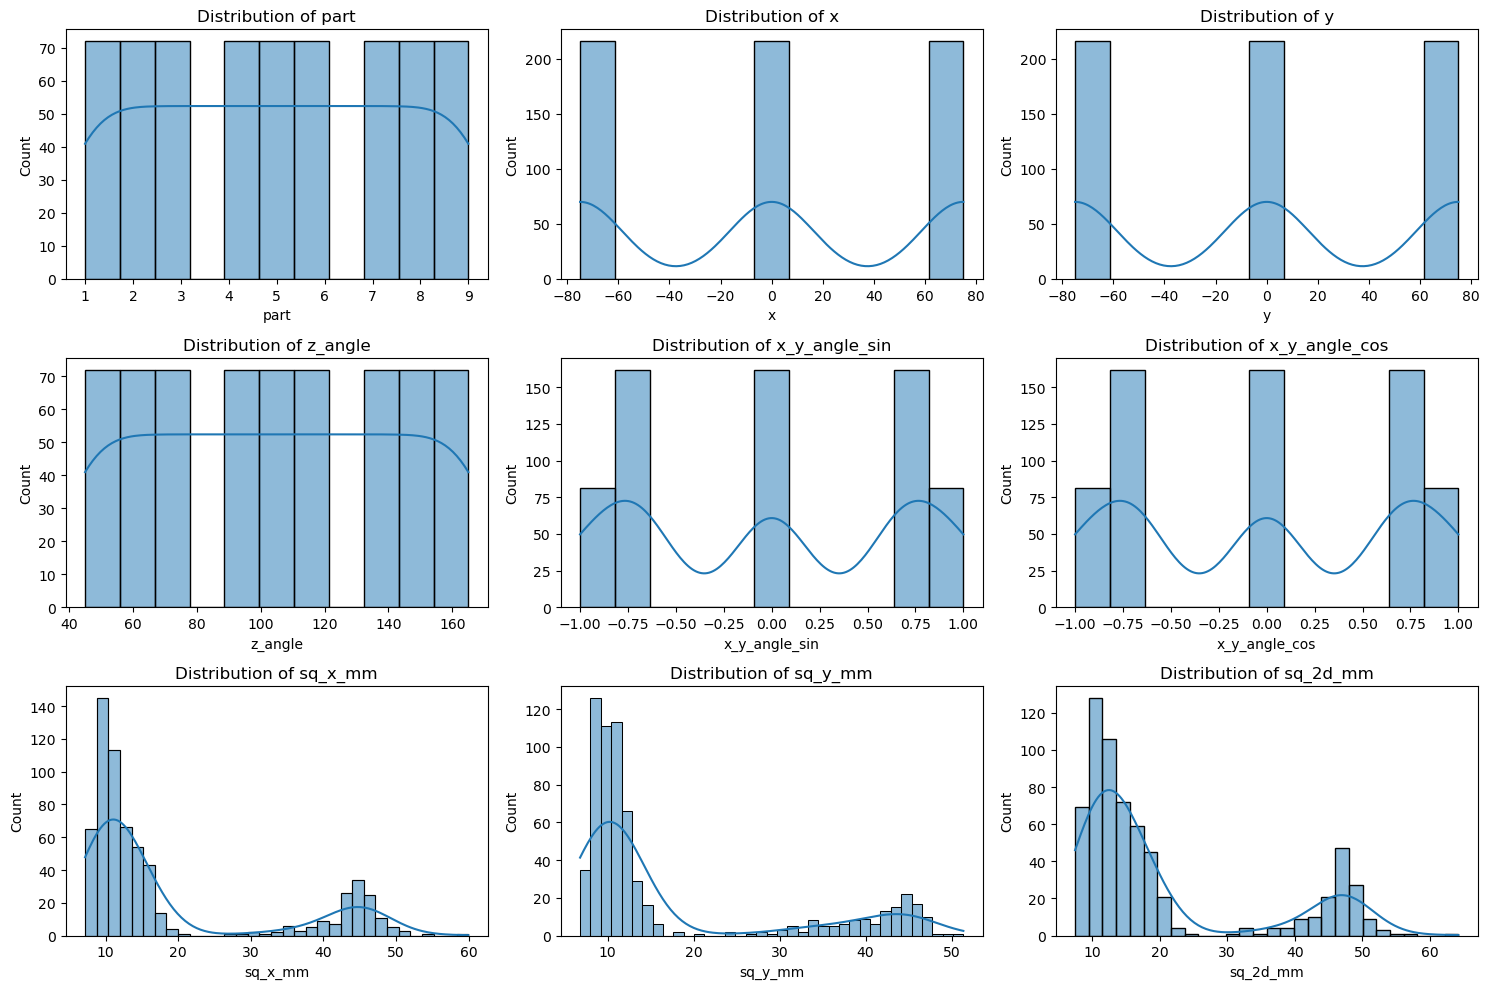

In [24]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_selected[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


# HOLDING OUT ONE PART AT A TIME , gradient boosting regressor

# sq_x_mm

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_x_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []

# Loop through each unique part for cross-validation
for part in df_selected['part'].unique():
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part]
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part]
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train.drop('part', axis=1), y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test.drop('part', axis=1))
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)

# Calculate average MSE and R^2 over all cross-validation folds
avg_mse = sum(mse_list) / len(mse_list)
avg_r2 = sum(r2_list) / len(r2_list)

avg_mse, avg_r2


(5.727232857686321, 0.9684768154308316)

# sq_y_mm

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_y_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []

# Loop through each unique part for cross-validation
for part in df_selected['part'].unique():
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part]
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part]
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train.drop('part', axis=1), y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test.drop('part', axis=1))
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)

# Calculate average MSE and R^2 over all cross-validation folds
avg_mse = sum(mse_list) / len(mse_list)
avg_r2 = sum(r2_list) / len(r2_list)

avg_mse, avg_r2


(4.732092909773744, 0.9712800676682293)

# sq_2d_mm

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []

# Loop through each unique part for cross-validation
for part in df_selected['part'].unique():
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part]
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part]
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train.drop('part', axis=1), y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test.drop('part', axis=1))
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)

# Calculate average MSE and R^2 over all cross-validation folds
avg_mse = sum(mse_list) / len(mse_list)
avg_r2 = sum(r2_list) / len(r2_list)

avg_mse, avg_r2


(6.622957130354462, 0.965634470826148)

# With parts separated and modelled on each part

In [28]:
# Creating a dictionary to store dataframes for each part
dfs = {}

# Splitting the main dataframe into separate dataframes based on 'part' value
for part_num in range(1, 10):
    dfs[part_num] = df_selected[df_selected['part'] == part_num]


In [29]:
dfs[1]

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm
0,1,-75,75,165,0.000000,1.000000,14.303308,11.139786,16.331449
1,1,-75,75,150,0.000000,1.000000,11.925943,10.973038,13.834006
2,1,-75,75,135,0.000000,1.000000,11.950379,11.458671,13.309392
3,1,-75,75,120,0.000000,1.000000,10.053210,9.503831,10.536805
4,1,-75,75,105,0.000000,1.000000,10.007268,9.359134,10.356003
...,...,...,...,...,...,...,...,...,...
67,1,-75,75,105,-0.707107,0.707107,10.664383,9.766962,11.463786
68,1,-75,75,90,-0.707107,0.707107,12.396920,10.395240,12.854311
69,1,-75,75,75,-0.707107,0.707107,13.824486,12.314842,14.806164
70,1,-75,75,60,-0.707107,0.707107,36.832878,32.942349,38.515694


In [30]:
# Creating dictionaries to store training and testing dataframes for each part
train_dfs = {}
test_dfs = {}

# Splitting the main dataframe into training and testing sets based on 'part' value
for part_num in range(1, 10):
    # Testing dataframe (only current part)
    test_dfs[part_num] = df_selected[df_selected['part'] == part_num]
    
    # Training dataframe (excluding current part)
    train_dfs[part_num] = df_selected[df_selected['part'] != part_num]


In [31]:
# Initializing lists to store the shapes
train_shapes = []
test_shapes = []

# Iterating over all parts from 1 to 9
for part_num in range(1, 10):
    train_shapes.append(train_dfs[part_num].shape)
    test_shapes.append(test_dfs[part_num].shape)

# Displaying the shapes
for part_num, (train_shape, test_shape) in enumerate(zip(train_shapes, test_shapes), 1):
    print(f"For part {part_num}:")
    print(f"Train dataset shape: {train_shape}")
    print(f"Test dataset shape: {test_shape}")
    print("-----")


For part 1:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 2:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 3:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 4:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 5:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 6:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 7:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 8:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----
For part 9:
Train dataset shape: (576, 9)
Test dataset shape: (72, 9)
-----


In [32]:
# test_dfs[1] will be the test set (only data from part 1)
# train_dfs[1] will be the training set (data excluding part 1)

# sq_2d_mm

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current part
    results[part] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for part in results:
    print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")


Part 1: MSE = 8.263, R^2 = 0.957
Part 2: MSE = 8.538, R^2 = 0.955
Part 3: MSE = 9.749, R^2 = 0.943
Part 4: MSE = 3.712, R^2 = 0.982
Part 5: MSE = 3.186, R^2 = 0.984
Part 6: MSE = 4.902, R^2 = 0.972
Part 7: MSE = 4.370, R^2 = 0.979
Part 8: MSE = 6.226, R^2 = 0.972
Part 9: MSE = 10.660, R^2 = 0.946


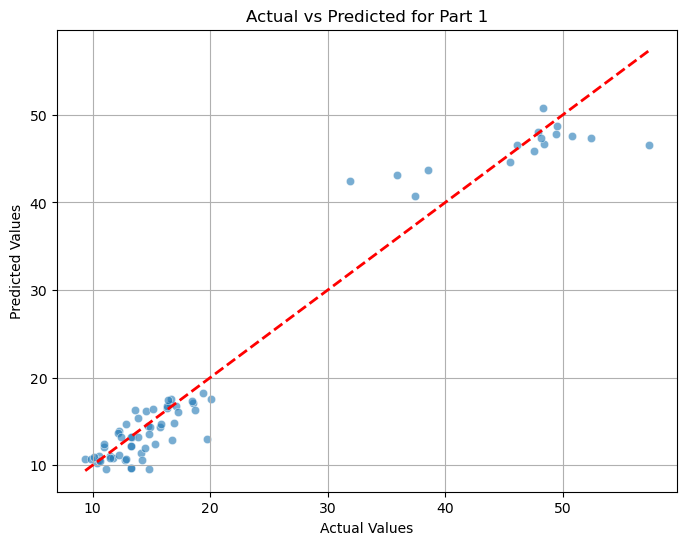

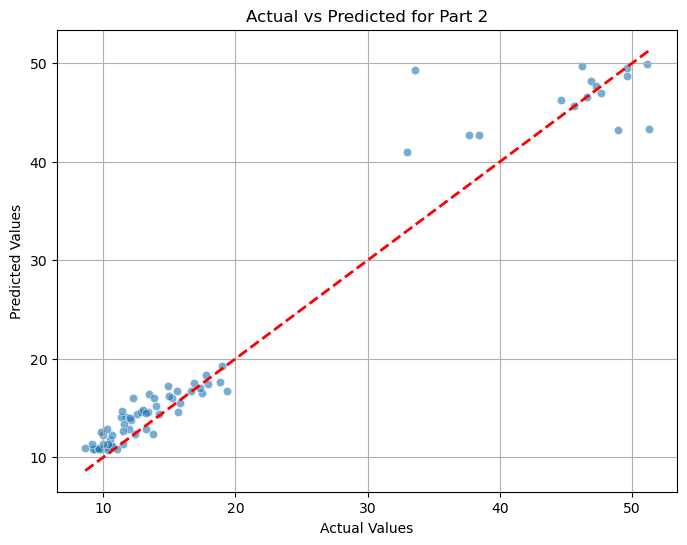

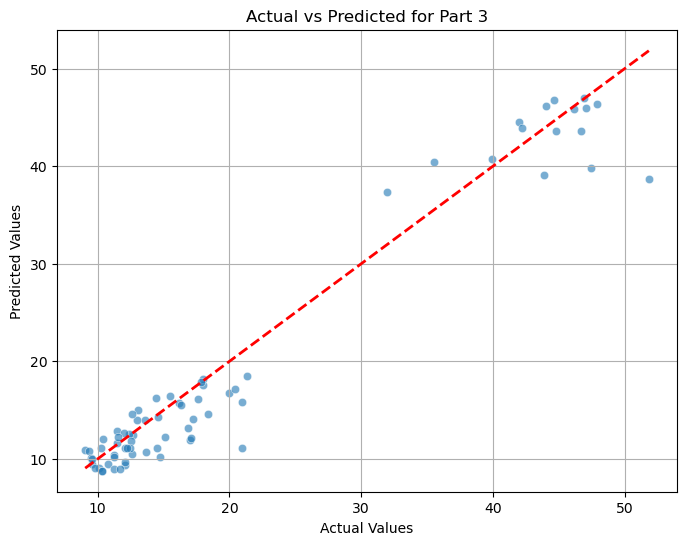

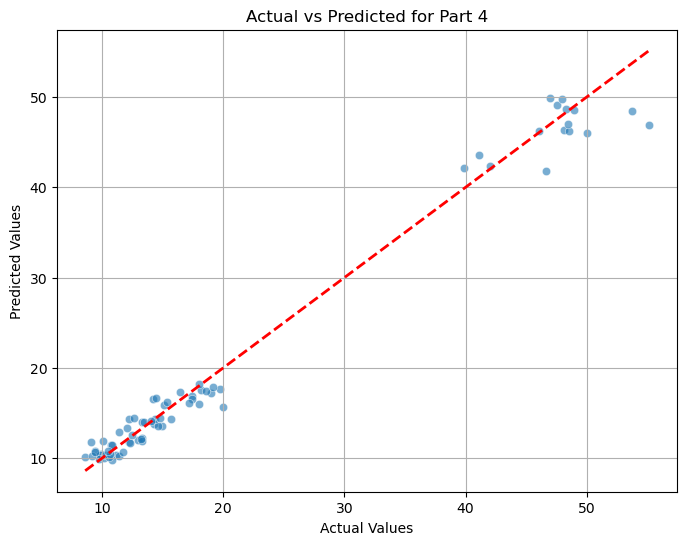

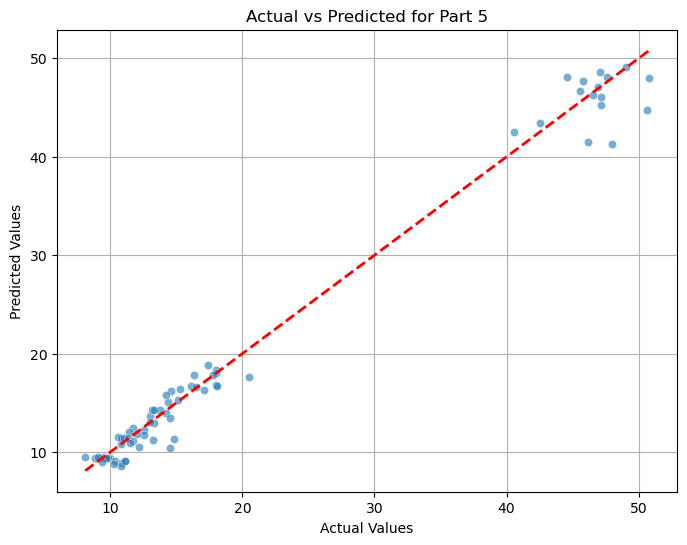

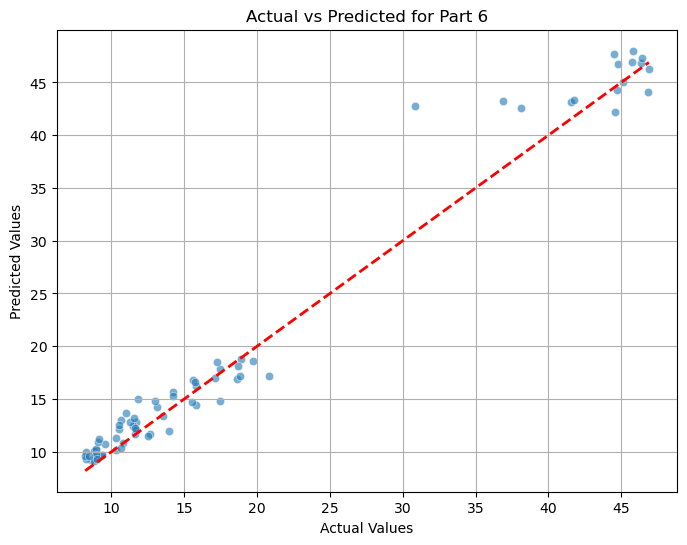

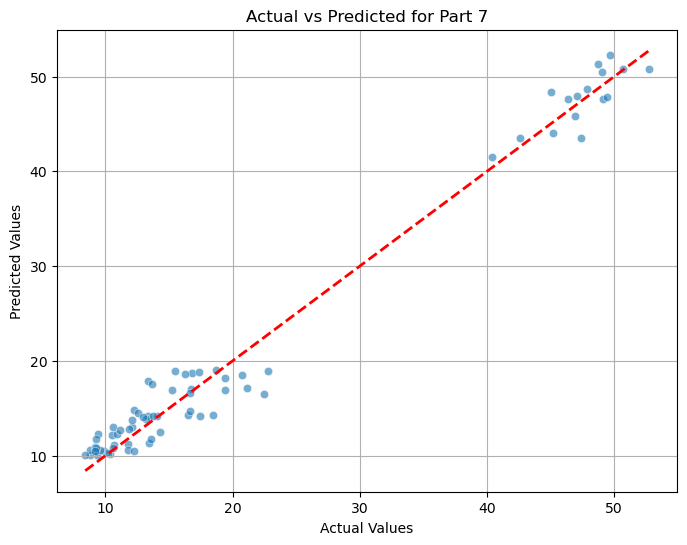

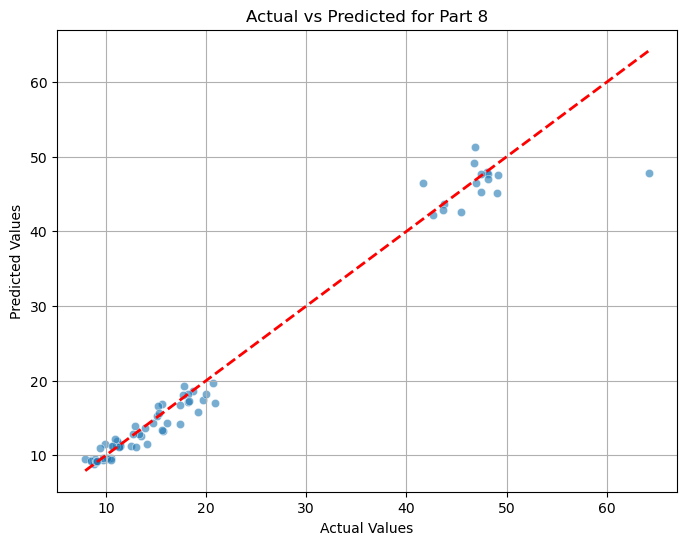

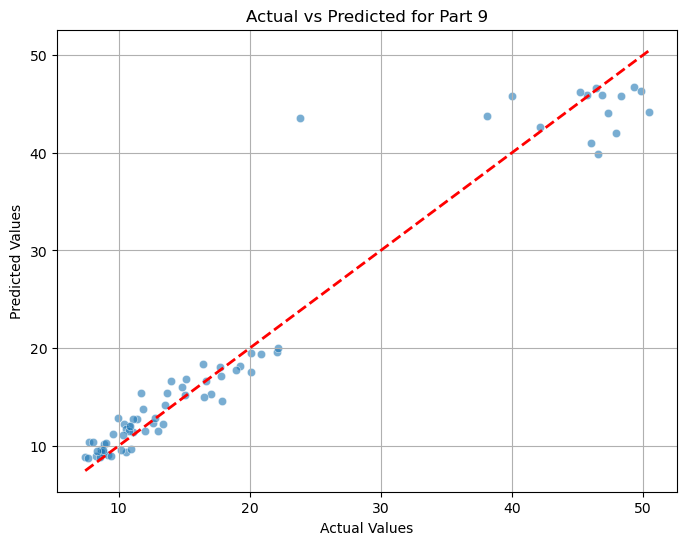

In [34]:
# Plotting actual vs predicted values for each part
for part in results:
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Part {part}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

In [35]:
# getting outliers with max residual

In [36]:
# Find the index of the largest residual for each part
largest_residual_indices = {}

for part in results:
    residuals = np.array(results[part]['Residuals'])
    largest_residual_index = np.argmax(np.abs(residuals))
    largest_residual_indices[part] = largest_residual_index

# Using the above index, retrieve the corresponding data row
for part in results:
    index = largest_residual_indices[part]
    outlier_row = df_selected[X['part'] == part].iloc[index]
    print(f"Outlier for Part {part}:")
    print(outlier_row)
    print('-'*50)

Outlier for Part 1:
part             1.000000e+00
x               -7.500000e+01
y                7.500000e+01
z_angle          6.000000e+01
x_y_angle_sin    1.000000e+00
x_y_angle_cos    6.123234e-17
sq_x_mm          5.362212e+01
sq_y_mm          5.137105e+01
sq_2d_mm         5.732457e+01
Name: 25, dtype: float64
--------------------------------------------------
Outlier for Part 2:
part             2.000000e+00
x                0.000000e+00
y                7.500000e+01
z_angle          6.000000e+01
x_y_angle_sin    1.000000e+00
x_y_angle_cos    6.123234e-17
sq_x_mm          3.053331e+01
sq_y_mm          2.806986e+01
sq_2d_mm         3.359272e+01
Name: 97, dtype: float64
--------------------------------------------------
Outlier for Part 3:
part              3.000000
x                75.000000
y                75.000000
z_angle          60.000000
x_y_angle_sin     0.000000
x_y_angle_cos     1.000000
sq_x_mm          49.301277
sq_y_mm          45.462329
sq_2d_mm         51.823711
Name:

In [37]:
import pandas as pd

# Assuming df_selected is your original DataFrame
# and the previous code for Gradient Boosting Regressor has been executed

# Initialize an empty list to store residuals
residuals_2d = []

# Loop through each unique part, calculate residuals, and append them to the residuals_y list
for part in part_list:
    # Retrieve actual and predicted values
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    
    # Calculate residuals for the current part
    residuals_current_part = np.array(actual_values) - np.array(predicted_values)
    
    # Append residuals to the residuals_x list
    residuals_2d.extend(residuals_current_part)

# Add the residuals as a new column in the original DataFrame
df_selected['residuals_2d'] = residuals_2d

# Now, df_selected contains a new column 'residuals_x' with the residuals of the 'sq_y_mm' predictions
df_selected

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,residuals_2d
0,1,-75,75,165,0.000000,1.000000,14.303308,11.139786,16.331449,-0.213434
1,1,-75,75,150,0.000000,1.000000,11.925943,10.973038,13.834006,-1.545801
2,1,-75,75,135,0.000000,1.000000,11.950379,11.458671,13.309392,0.132690
3,1,-75,75,120,0.000000,1.000000,10.053210,9.503831,10.536805,-0.536063
4,1,-75,75,105,0.000000,1.000000,10.007268,9.359134,10.356003,0.107586
...,...,...,...,...,...,...,...,...,...,...
643,9,75,-75,105,-0.707107,0.707107,8.367722,7.708147,8.839090,-0.693128
644,9,75,-75,90,-0.707107,0.707107,7.963393,7.578396,8.352485,-1.161477
645,9,75,-75,75,-0.707107,0.707107,8.910831,8.756021,10.846057,-1.172459
646,9,75,-75,60,-0.707107,0.707107,39.928397,34.320573,42.103473,-0.556418


/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


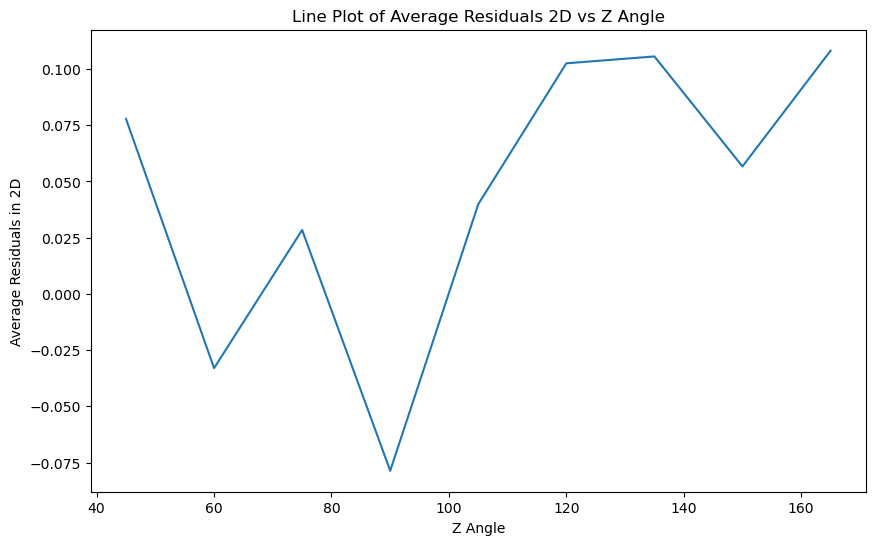

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df_grouped = df_selected.groupby('z_angle')['residuals_2d'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="z_angle", y="residuals_2d")
plt.title("Line Plot of Average Residuals 2D vs Z Angle")
plt.xlabel("Z Angle")
plt.ylabel("Average Residuals in 2D")
plt.show()


# removing the outliers

In [39]:
all_residuals = []
for part in results:
    part_data = df_selected[df_selected['part'] == part]
    residuals = results[part]['Residuals']
    part_data['Residual'] = residuals
    all_residuals.append(part_data)

df_with_residuals = pd.concat(all_residuals)

Q1 = df_with_residuals['Residual'].quantile(0.25)
Q3 = df_with_residuals['Residual'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_with_residuals['Residual'] < (Q1 - 1.5 * IQR)) | (df_with_residuals['Residual'] > (Q3 + 1.5 * IQR))
df_cleaned = df_with_residuals[~outlier_mask]

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Residual'] = residuals
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Residual'] = residuals
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [40]:
outlier_mask.shape

(648,)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_cleaned[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_cleaned['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

part_list = df_cleaned['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current part
    results[part] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for part in results:
    print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")


Part 1: MSE = 3.351, R^2 = 0.979
Part 2: MSE = 2.618, R^2 = 0.984
Part 3: MSE = 4.052, R^2 = 0.973
Part 4: MSE = 1.680, R^2 = 0.990
Part 5: MSE = 1.529, R^2 = 0.991
Part 6: MSE = 1.749, R^2 = 0.990
Part 7: MSE = 2.402, R^2 = 0.989
Part 8: MSE = 2.108, R^2 = 0.989
Part 9: MSE = 2.481, R^2 = 0.984


# Modeling for every z angle and other features

In [42]:
df1 = pd.read_excel("surface_roughnes_multi_submit_02_05_23 (3).xlsx")
selected_columns = ["part","x", "y", "x_y_angle", "z_angle", "sq_x", "sq_y", "sq_2d"]
df_selected_orig = df1[selected_columns]

In [43]:
df_selected_orig.columns

Index(['part', 'x', 'y', 'x_y_angle', 'z_angle', 'sq_x', 'sq_y', 'sq_2d'], dtype='object')

In [44]:
import numpy as np

# Convert angles to radians
df_selected_orig['x_y_angle_rad'] = np.radians(df_selected_orig['x_y_angle'])

# Compute sine and cosine transformations
df_selected_orig['x_y_angle_sin'] = np.sin(df_selected_orig['x_y_angle_rad'])
df_selected_orig['x_y_angle_cos'] = np.cos(df_selected_orig['x_y_angle_rad'])

# Drop the temporary radian columns
df_selected_orig = df_selected_orig.drop(columns=['x_y_angle_rad',"x_y_angle"])

df_selected_orig['sq_x_mm'] = df_selected_orig["sq_x"]*1e6
df_selected_orig['sq_y_mm'] = df_selected_orig["sq_y"]*1e6
df_selected_orig['sq_2d_mm'] = df_selected_orig["sq_2d"]*1e6

df_selected_orig = df_selected_orig.drop(columns=['sq_x',"sq_y",'sq_2d'])


/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1840796081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig['x_y_angle_rad'] = np.radians(df_selected_orig['x_y_angle'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1840796081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig['x_y_angle_sin'] = np.sin(df_selected_orig['x_y_angle_rad'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/1840796081.py:8: SettingWithCopyWar

In [45]:
df_selected_orig.columns

Index(['part', 'x', 'y', 'z_angle', 'x_y_angle_sin', 'x_y_angle_cos',
       'sq_x_mm', 'sq_y_mm', 'sq_2d_mm'],
      dtype='object')

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected_orig['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

z_angle_list = df_selected_orig['z_angle'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for angle in z_angle_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['z_angle'] != angle].drop('z_angle', axis=1)
    y_train = y[X['z_angle'] != angle]
    
    X_test = X[X['z_angle'] == angle].drop('z_angle', axis=1)
    y_test = y[X['z_angle'] == angle]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current part
    results[angle] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for z_angle in results:
    print(f"z_angle {z_angle}: MSE = {results[z_angle]['MSE']:.3f}, R^2 = {results[z_angle]['R2']:.3f}")


z_angle 165: MSE = 12.047, R^2 = -2.634
z_angle 150: MSE = 28.290, R^2 = -3.212
z_angle 135: MSE = 55.067, R^2 = -12.768
z_angle 120: MSE = 101.059, R^2 = -32.280
z_angle 105: MSE = 139.390, R^2 = -77.878
z_angle 90: MSE = 143.056, R^2 = -99.588
z_angle 75: MSE = 81.410, R^2 = -18.864
z_angle 60: MSE = 757.690, R^2 = -16.492
z_angle 45: MSE = 914.590, R^2 = -302.086


In [47]:
# for random forest

z_angle 165: MSE = 12.232, R^2 = -2.690
z_angle 150: MSE = 28.832, R^2 = -3.293
z_angle 135: MSE = 55.435, R^2 = -12.860
z_angle 120: MSE = 101.044, R^2 = -32.275
z_angle 105: MSE = 139.251, R^2 = -77.799
z_angle 90: MSE = 143.041, R^2 = -99.577
z_angle 75: MSE = 81.297, R^2 = -18.837
z_angle 60: MSE = 755.360, R^2 = -16.438
z_angle 45: MSE = 912.534, R^2 = -301.404


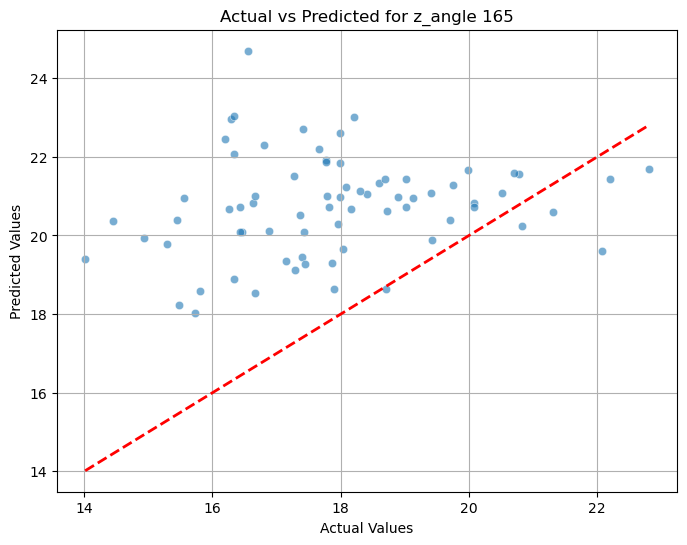

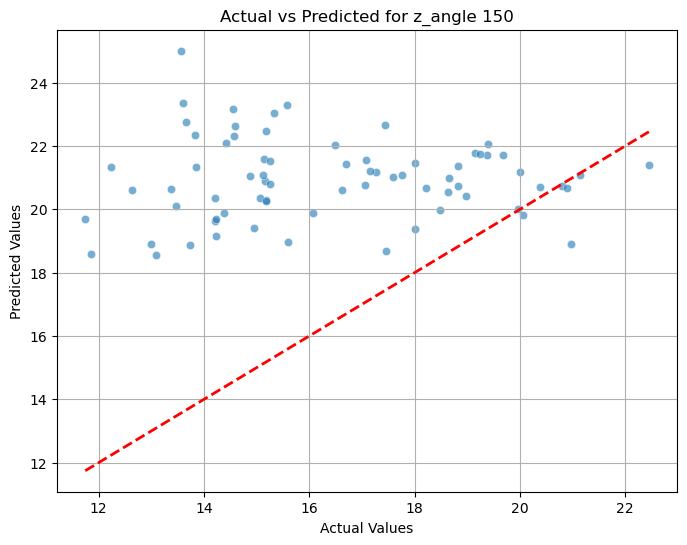

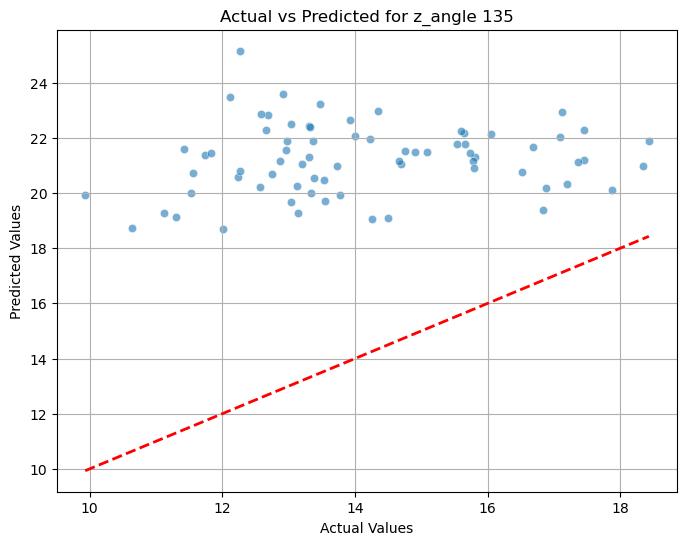

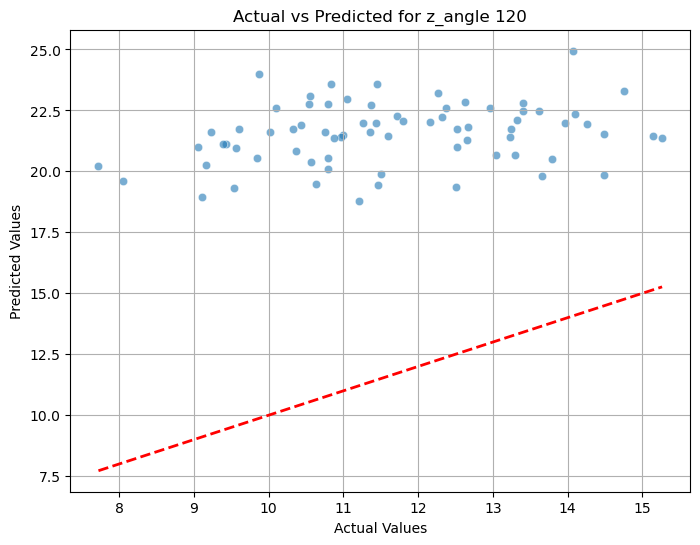

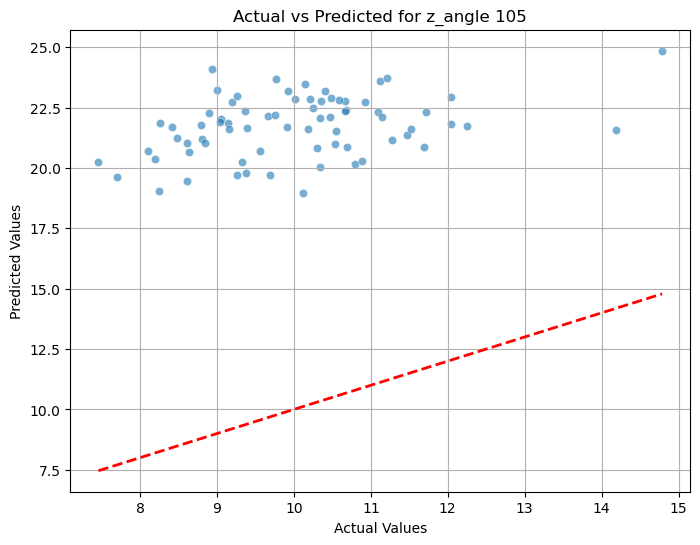

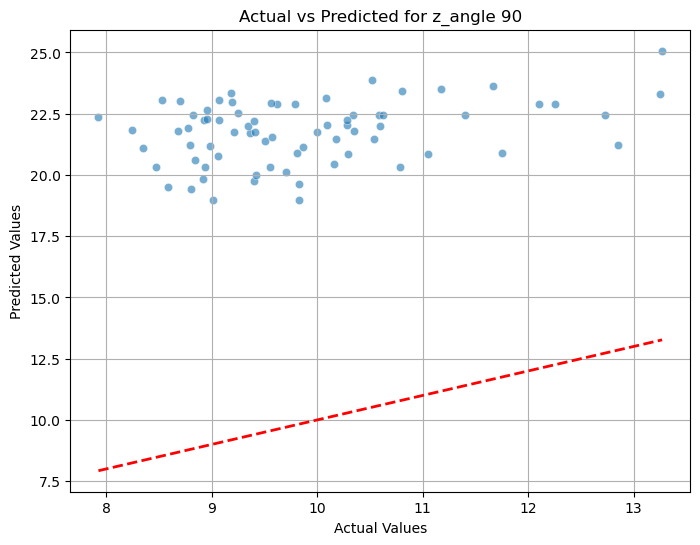

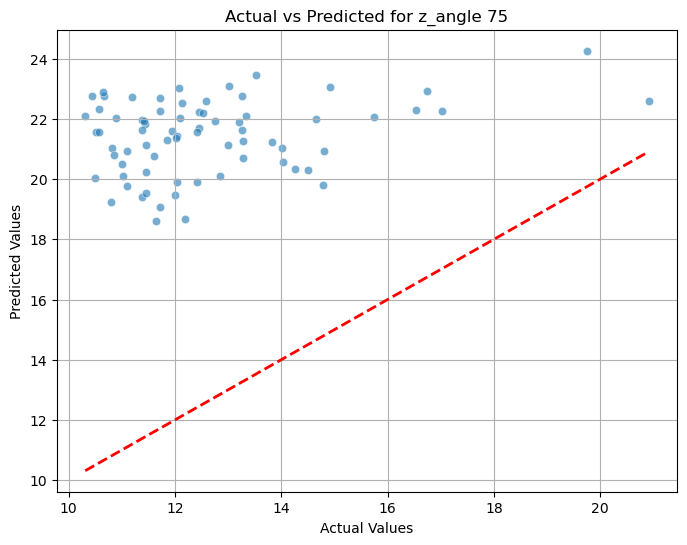

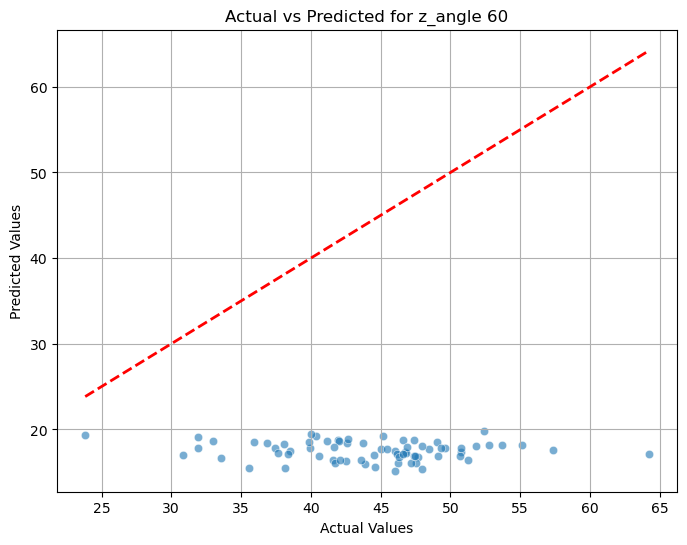

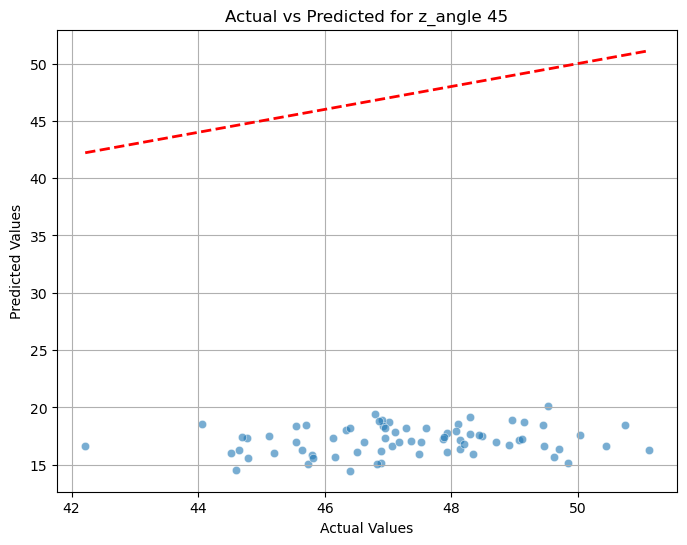

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected_orig['sq_2d_mm']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

z_angle_list = df_selected_orig['z_angle'].unique()

# Dictionary to store results for each z_angle
results = {}

# Loop through each unique z_angle for cross-validation
for angle in z_angle_list:
    # Split the data into training and testing sets based on the z_angle
    X_train = X[X['z_angle'] != angle].drop('z_angle', axis=1)
    y_train = y[X['z_angle'] != angle]
    
    X_test = X[X['z_angle'] == angle].drop('z_angle', axis=1)
    y_test = y[X['z_angle'] == angle]
    
    # Train the Random Forest Regressor
    rf_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_rf = rf_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Random Forest Regressor
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    # Calculate residuals
    residuals = y_test - y_pred_rf

    # Store results for the current z_angle
    results[angle] = {
        'MSE': mse_rf,
        'R2': r2_rf,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_rf.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each z_angle
for z_angle in results:
    print(f"z_angle {z_angle}: MSE = {results[z_angle]['MSE']:.3f}, R^2 = {results[z_angle]['R2']:.3f}")

# Plotting actual vs predicted values for each z_angle
for z_angle in results:
    actual_values = results[z_angle]['Actual']
    predicted_values = results[z_angle]['Predicted']

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for z_angle {z_angle}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()


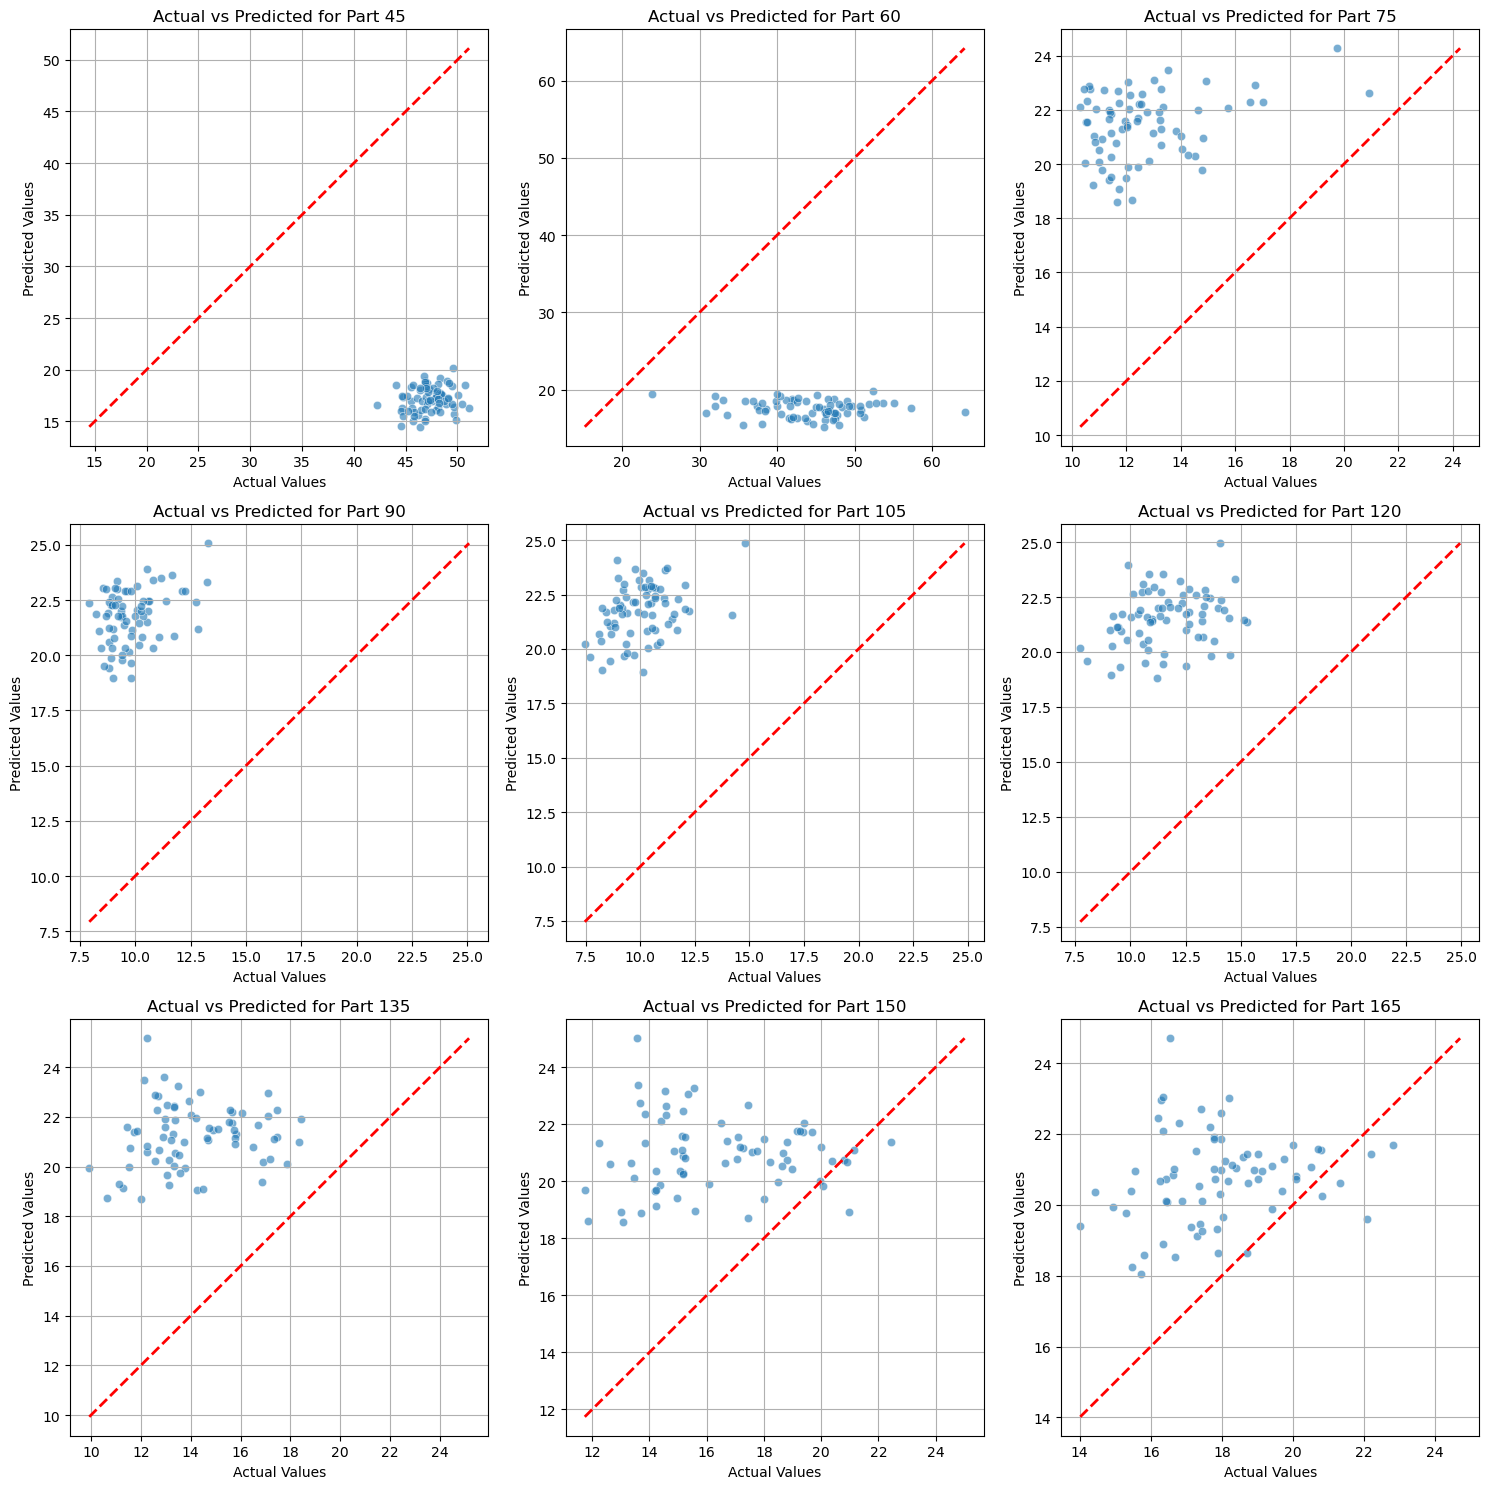

In [49]:
import matplotlib.pyplot as plt

# Assuming 'results' is a dictionary with parts as keys and 'Actual' and 'Predicted' as sub-keys
part_list = sorted(results.keys())  # Sort parts if necessary
n_parts = len(part_list)
n_cols = 3  # Number of columns in the subplot grid
n_rows = n_parts // n_cols + (n_parts % n_cols > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate over

for i, part in enumerate(part_list):
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    min_val, max_val = min(actual_values + predicted_values), max(actual_values + predicted_values)
    
    axes[i].scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[i].set_title(f'Actual vs Predicted for Part {part}')
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].grid(True)

# If the number of parts is not a multiple of the number of columns, hide the extra subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [50]:
# for xy angle

In [51]:
df_selected_orig_xy = df1[selected_columns]

df_selected_orig_xy['sq_x_mm'] = df_selected_orig_xy["sq_x"]*1e6
df_selected_orig_xy['sq_y_mm'] = df_selected_orig_xy["sq_y"]*1e6
df_selected_orig_xy['sq_2d_mm'] = df_selected_orig_xy["sq_2d"]*1e6

df_selected_orig_xy = df_selected_orig_xy.drop(columns=['sq_x',"sq_y",'sq_2d'])
df_selected_orig_xy.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/3879615858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig_xy['sq_x_mm'] = df_selected_orig_xy["sq_x"]*1e6
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/3879615858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig_xy['sq_y_mm'] = df_selected_orig_xy["sq_y"]*1e6
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/3879615858.py:5: SettingWithCopyWarning: 
A value is trying t

,part,x,y,x_y_angle,z_angle,sq_x_mm,sq_y_mm,sq_2d_mm
0,1,-75,75,0,165,14.303308,11.139786,16.331449
1,1,-75,75,0,150,11.925943,10.973038,13.834006
2,1,-75,75,0,135,11.950379,11.458671,13.309392
3,1,-75,75,0,120,10.053210,9.503831,10.536805
4,1,-75,75,0,105,10.007268,9.359134,10.356003


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure the DataFrame name is consistent
X = df_selected_orig_xy[['part', 'x', 'y', 'x_y_angle', 'z_angle']]
y = df_selected_orig_xy['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Ensure to use the same DataFrame that contains 'x_y_angle' column
xy_angle_list = df_selected_orig_xy['x_y_angle'].unique()

# Dictionary to store results for each x_y_angle
results = {}

# Loop through each unique x_y_angle for cross-validation
for angle in xy_angle_list:
    # Split the data into training and testing sets based on the x_y_angle
    X_train = X[X['x_y_angle'] != angle].drop('x_y_angle', axis=1)
    y_train = y[X['x_y_angle'] != angle]
    
    X_test = X[X['x_y_angle'] == angle].drop('x_y_angle', axis=1)
    y_test = y[X['x_y_angle'] == angle]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current x_y_angle
    results[angle] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each x_y_angle
for angle in results:
    print(f"x_y_angle {angle}: MSE = {results[angle]['MSE']:.3f}, R^2 = {results[angle]['R2']:.3f}")


x_y_angle 0: MSE = 11.105, R^2 = 0.946
x_y_angle 45: MSE = 5.879, R^2 = 0.971
x_y_angle 90: MSE = 8.618, R^2 = 0.957
x_y_angle 135: MSE = 12.760, R^2 = 0.945
x_y_angle 180: MSE = 8.758, R^2 = 0.951
x_y_angle 225: MSE = 7.344, R^2 = 0.960
x_y_angle 270: MSE = 6.982, R^2 = 0.962
x_y_angle 315: MSE = 6.768, R^2 = 0.964


In [53]:
# trying gridsearchcv()

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Score:", grid_search.best_score_)

# You can also use the best estimator directly
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.9665536407297802


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected_orig_xy[['part', 'x', 'y', 'x_y_angle', 'z_angle']]
y = df_selected_orig_xy['sq_2d_mm']

# Initialize the Gradient Boosting Regressor with the best parameters
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=4,
    n_estimators=100,
    random_state=42
)

xy_angle_list = df_selected_orig_xy['x_y_angle'].unique()

# Dictionary to store results for each x_y_angle
results = {}

# Loop through each unique x_y_angle for cross-validation
for angle in xy_angle_list:
    # Split the data into training and testing sets based on the x_y_angle
    X_train = X[X['x_y_angle'] != angle].drop('x_y_angle', axis=1)
    y_train = y[X['x_y_angle'] != angle]
    
    X_test = X[X['x_y_angle'] == angle].drop('x_y_angle', axis=1)
    y_test = y[X['x_y_angle'] == angle]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current x_y_angle
    results[angle] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each x_y_angle
for angle in results:
    print(f"x_y_angle {angle}: MSE = {results[angle]['MSE']:.3f}, R^2 = {results[angle]['R2']:.3f}")


x_y_angle 0: MSE = 11.097, R^2 = 0.946
x_y_angle 45: MSE = 6.236, R^2 = 0.970
x_y_angle 90: MSE = 8.704, R^2 = 0.957
x_y_angle 135: MSE = 12.907, R^2 = 0.945
x_y_angle 180: MSE = 8.580, R^2 = 0.952
x_y_angle 225: MSE = 7.754, R^2 = 0.958
x_y_angle 270: MSE = 7.150, R^2 = 0.961
x_y_angle 315: MSE = 7.244, R^2 = 0.961


In [56]:
# x_y_angle 0: MSE = 11.105, R^2 = 0.946
# x_y_angle 45: MSE = 5.879, R^2 = 0.971
# x_y_angle 90: MSE = 8.618, R^2 = 0.957
# x_y_angle 135: MSE = 12.760, R^2 = 0.945
# x_y_angle 180: MSE = 8.758, R^2 = 0.951
# x_y_angle 225: MSE = 7.344, R^2 = 0.960
# x_y_angle 270: MSE = 6.982, R^2 = 0.962
# x_y_angle 315: MSE = 6.768, R^2 = 0.964

# now, after applying gridsearch:

# x_y_angle 0: MSE = 11.097, R^2 = 0.946
# x_y_angle 45: MSE = 6.236, R^2 =       0.970
# x_y_angle 90: MSE = 8.704, R^2 = 0.957
# x_y_angle 135: MSE = 12.907, R^2 = 0.945
# x_y_angle 180: MSE = 8.580, R^2 = 0.952
# x_y_angle 225: MSE = 7.754, R^2 = 0.958
# x_y_angle 270: MSE = 7.150, R^2 = 0.961
# x_y_angle 315: MSE = 7.244, R^2 = 0.961

# removing the outliers

In [57]:
df_with_residuals = pd.DataFrame()
for angle in results:
    angle_data = df_selected_orig_xy[df_selected_orig_xy['x_y_angle'] == angle]
    angle_data['Residual'] = results[angle]['Residuals']
    df_with_residuals = pd.concat([df_with_residuals, angle_data])

# Step 3: Apply IQR method on residuals
Q1 = df_with_residuals['Residual'].quantile(0.25)
Q3 = df_with_residuals['Residual'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_with_residuals['Residual'] < (Q1 - 1.5 * IQR)) | (df_with_residuals['Residual'] > (Q3 + 1.5 * IQR))
df_cleaned = df_with_residuals[~outlier_mask]

df_cleaned.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/2424559439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle_data['Residual'] = results[angle]['Residuals']
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/2424559439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle_data['Residual'] = results[angle]['Residuals']
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/2424559439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,part,x,y,x_y_angle,z_angle,sq_x_mm,sq_y_mm,sq_2d_mm,Residual
0,1,-75,75,0,165,14.303308,11.139786,16.331449,-1.355013
1,1,-75,75,0,150,11.925943,10.973038,13.834006,-2.584260
2,1,-75,75,0,135,11.950379,11.458671,13.309392,-0.886752
3,1,-75,75,0,120,10.053210,9.503831,10.536805,-2.409125
4,1,-75,75,0,105,10.007268,9.359134,10.356003,-1.894227


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_cleaned[['part', 'x', 'y', 'x_y_angle', 'z_angle']]
y = df_cleaned['sq_2d_mm']

# Initialize the Gradient Boosting Regressor with the best parameters
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=4,
    n_estimators=100,
    random_state=42
)

xy_angle_list = df_cleaned['x_y_angle'].unique()

# Dictionary to store results for each x_y_angle
results = {}

# Loop through each unique x_y_angle for cross-validation
for angle in xy_angle_list:
    # Split the data into training and testing sets based on the x_y_angle
    X_train = X[X['x_y_angle'] != angle].drop('x_y_angle', axis=1)
    y_train = y[X['x_y_angle'] != angle]
    
    X_test = X[X['x_y_angle'] == angle].drop('x_y_angle', axis=1)
    y_test = y[X['x_y_angle'] == angle]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current x
    results[angle] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each x_y_angle
for angle in results:
    print(f"x_y_angle {angle}: MSE = {results[angle]['MSE']:.3f}, R^2 = {results[angle]['R2']:.3f}")


x_y_angle 0: MSE = 4.544, R^2 = 0.976
x_y_angle 45: MSE = 4.478, R^2 = 0.976
x_y_angle 90: MSE = 3.353, R^2 = 0.981
x_y_angle 135: MSE = 3.515, R^2 = 0.975
x_y_angle 180: MSE = 3.019, R^2 = 0.982
x_y_angle 225: MSE = 3.994, R^2 = 0.977
x_y_angle 270: MSE = 4.342, R^2 = 0.976
x_y_angle 315: MSE = 3.007, R^2 = 0.981


In [59]:
# with x and y positions

In [60]:
df_selected_orig_x_and_y = df1[selected_columns]

df_selected_orig_x_and_y['sq_x_mm'] = df_selected_orig_x_and_y["sq_x"]*1e6
df_selected_orig_x_and_y['sq_y_mm'] = df_selected_orig_x_and_y["sq_y"]*1e6
df_selected_orig_x_and_y['sq_2d_mm'] = df_selected_orig_x_and_y["sq_2d"]*1e6

df_selected_orig_x_and_y = df_selected_orig_x_and_y.drop(columns=['sq_x',"sq_y",'sq_2d'])
df_selected_orig_x_and_y.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/4220291021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig_x_and_y['sq_x_mm'] = df_selected_orig_x_and_y["sq_x"]*1e6
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/4220291021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_orig_x_and_y['sq_y_mm'] = df_selected_orig_x_and_y["sq_y"]*1e6
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/4220291021.py:5: SettingWithCopyWarning: 

,part,x,y,x_y_angle,z_angle,sq_x_mm,sq_y_mm,sq_2d_mm
0,1,-75,75,0,165,14.303308,11.139786,16.331449
1,1,-75,75,0,150,11.925943,10.973038,13.834006
2,1,-75,75,0,135,11.950379,11.458671,13.309392
3,1,-75,75,0,120,10.053210,9.503831,10.536805
4,1,-75,75,0,105,10.007268,9.359134,10.356003


In [61]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_selected_orig_xy is your DataFrame
X = df_selected_orig_x_and_y[['part', 'x', 'y', 'x_y_angle', 'z_angle']]
y = df_selected_orig_x_and_y['sq_2d_mm']

# Initialize the model with the optimal parameters
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=100, random_state=42)

# Get unique x and y pairs
unique_xy_pairs = df_selected_orig_x_and_y[['x', 'y']].drop_duplicates()

# Dictionary to store results for each x and y pair
results = {}

# Loop through each unique (x, y) pair for cross-validation
for _, row in unique_xy_pairs.iterrows():
    x_val, y_val = row['x'], row['y']
    
    # Split the data into training and testing sets based on the x and y values
    X_train = X[(X['x'] != x_val) | (X['y'] != y_val)]
    y_train = y[(X['x'] != x_val) | (X['y'] != y_val)]
    
    X_test = X[(X['x'] == x_val) & (X['y'] == y_val)]
    y_test = y[(X['x'] == x_val) & (X['y'] == y_val)]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error, R^2 score, and residuals
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    residuals = y_test - y_pred_gb

    # Store results for the current (x, y) pair
    results[(x_val, y_val)] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each (x, y) pair
for xy_pair in results:
    print(f"(x, y) = {xy_pair}: MSE = {results[xy_pair]['MSE']:.3f}, R^2 = {results[xy_pair]['R2']:.3f}")


(x, y) = (-75, 75): MSE = 10.347, R^2 = 0.946
(x, y) = (0, 75): MSE = 11.722, R^2 = 0.939
(x, y) = (75, 75): MSE = 7.532, R^2 = 0.956
(x, y) = (-75, 0): MSE = 2.469, R^2 = 0.988
(x, y) = (0, 0): MSE = 2.688, R^2 = 0.987
(x, y) = (75, 0): MSE = 6.997, R^2 = 0.960
(x, y) = (-75, -75): MSE = 3.563, R^2 = 0.983
(x, y) = (0, -75): MSE = 4.283, R^2 = 0.980
(x, y) = (75, -75): MSE = 8.908, R^2 = 0.955


In [62]:
# Part 1: MSE = 8.263, R^2 = 0.957
# Part 2: MSE = 8.538, R^2 = 0.955
# Part 3: MSE = 9.749, R^2 = 0.943
# Part 4: MSE = 3.712, R^2 = 0.982
# Part 5: MSE = 3.186, R^2 = 0.984
# Part 6: MSE = 4.902, R^2 = 0.972
# Part 7: MSE = 4.370, R^2 = 0.979
# Part 8: MSE = 6.226, R^2 = 0.972
# Part 9: MSE = 10.660, R^2 = 0.946

# removing the outliers

In [63]:
# Combine residuals into a DataFrame
df_with_residuals = pd.DataFrame()
for xy_pair in results:
    xy_data = df_selected_orig_x_and_y[(df_selected_orig_x_and_y['x'] == xy_pair[0]) & (df_selected_orig_x_and_y['y'] == xy_pair[1])]
    xy_data['Residual'] = results[xy_pair]['Residuals']
    df_with_residuals = pd.concat([df_with_residuals, xy_data])

# Apply IQR method on residuals
Q1 = df_with_residuals['Residual'].quantile(0.25)
Q3 = df_with_residuals['Residual'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df_with_residuals['Residual'] < (Q1 - 1.5 * IQR)) | (df_with_residuals['Residual'] > (Q3 + 1.5 * IQR))
df_cleaned = df_with_residuals[~outlier_mask]

df_cleaned.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/337162547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_data['Residual'] = results[xy_pair]['Residuals']
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/337162547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_data['Residual'] = results[xy_pair]['Residuals']
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_87125/337162547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,part,x,y,x_y_angle,z_angle,sq_x_mm,sq_y_mm,sq_2d_mm,Residual
0,1,-75,75,0,165,14.303308,11.139786,16.331449,1.451866
1,1,-75,75,0,150,11.925943,10.973038,13.834006,0.907506
2,1,-75,75,0,135,11.950379,11.458671,13.309392,1.822600
3,1,-75,75,0,120,10.053210,9.503831,10.536805,0.280430
4,1,-75,75,0,105,10.007268,9.359134,10.356003,0.949583


In [64]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_selected_orig_xy is your DataFrame
X = df_cleaned[['part', 'x', 'y', 'x_y_angle', 'z_angle']]
y = df_cleaned['sq_2d_mm']

# Initialize the model with the optimal parameters
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=100, random_state=42)

# Get unique x and y pairs
unique_xy_pairs = df_cleaned[['x', 'y']].drop_duplicates()

# Dictionary to store results for each x and y pair
results = {}

# Loop through each unique (x, y) pair for cross-validation
for _, row in unique_xy_pairs.iterrows():
    x_val, y_val = row['x'], row['y']
    
    # Split the data into training and testing sets based on the x and y values
    X_train = X[(X['x'] != x_val) | (X['y'] != y_val)]
    y_train = y[(X['x'] != x_val) | (X['y'] != y_val)]
    
    X_test = X[(X['x'] == x_val) & (X['y'] == y_val)]
    y_test = y[(X['x'] == x_val) & (X['y'] == y_val)]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error, R^2 score, and residuals
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    residuals = y_test - y_pred_gb

    # Store results for the current (x, y) pair
    results[(x_val, y_val)] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each (x, y) pair
for xy_pair in results:
    print(f"(x, y) = {xy_pair}: MSE = {results[xy_pair]['MSE']:.3f}, R^2 = {results[xy_pair]['R2']:.3f}")


(x, y) = (-75, 75): MSE = 2.137, R^2 = 0.986
(x, y) = (0, 75): MSE = 1.743, R^2 = 0.988
(x, y) = (75, 75): MSE = 5.754, R^2 = 0.962
(x, y) = (-75, 0): MSE = 2.718, R^2 = 0.986
(x, y) = (0, 0): MSE = 1.275, R^2 = 0.993
(x, y) = (75, 0): MSE = 2.249, R^2 = 0.986
(x, y) = (-75, -75): MSE = 2.232, R^2 = 0.989
(x, y) = (0, -75): MSE = 1.665, R^2 = 0.991
(x, y) = (75, -75): MSE = 1.749, R^2 = 0.989


In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_selected is your DataFrame and has been defined earlier in your code

X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected_orig['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []
part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)
    
    # Store results for MSE, R^2, Actual and Predicted values
    results[part] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist()
    }

# Display MSE and R^2 for each part
for part in part_list:
    print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")

# Define a threshold for considering a point as an outlier
# For example, points beyond 1.5 times the interquartile range could be considered outliers
outlier_dfs = {}  

for part in part_list:
    # Calculate residuals
    actual_values = np.array(results[part]['Actual'])
    predicted_values = np.array(results[part]['Predicted'])
    residuals = actual_values - predicted_values

    # Compute the interquartile range (IQR)
    Q1 = np.percentile(residuals, 25)
    Q3 = np.percentile(residuals, 75)
    IQR = Q3 - Q1

    # Detect outliers using the IQR method
    outlier_mask = (residuals < Q1 - 1.5 * IQR) | (residuals > Q3 + 1.5 * IQR)
    
    # Extract the outlier rows from the original DataFrame
    outlier_indices = np.where(outlier_mask)[0]
    outlier_data = df_selected_orig.loc[X[X['part'] == part].iloc[outlier_indices].index]
    
    # Add the Predicted values and Residuals as new columns to the outlier DataFrame
    outlier_data = outlier_data.assign(Predicted_2d=predicted_values[outlier_mask])
    outlier_data = outlier_data.assign(Residual_2d=residuals[outlier_mask])
    
    # Store the outlier DataFrame in the dictionary using the part as the key
    outlier_dfs[part] = outlier_data


Part 1: MSE = 8.263, R^2 = 0.957
Part 2: MSE = 8.538, R^2 = 0.955
Part 3: MSE = 9.749, R^2 = 0.943
Part 4: MSE = 3.712, R^2 = 0.982
Part 5: MSE = 3.186, R^2 = 0.984
Part 6: MSE = 4.902, R^2 = 0.972
Part 7: MSE = 4.370, R^2 = 0.979
Part 8: MSE = 6.226, R^2 = 0.972
Part 9: MSE = 10.660, R^2 = 0.946


In [66]:
outlier_dfs[1]

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,Predicted_2d,Residual_2d
15,1,-75,75,75,0.707107,7.071068e-01,18.366164,17.809138,19.759955,12.995224,6.764731
25,1,-75,75,60,1.000000,6.123234e-17,53.622118,51.371050,57.324568,46.517711,10.806857
52,1,-75,75,60,-0.707107,-7.071068e-01,33.506447,29.485875,35.919426,43.159703,-7.240277
61,1,-75,75,60,-1.000000,-1.836970e-16,28.137140,24.777217,31.930096,42.429866,-10.499770
70,1,-75,75,60,-0.707107,7.071068e-01,36.832878,32.942349,38.515694,43.669546,-5.153851


In [67]:
all_outliers_df = pd.concat(outlier_dfs.values(), ignore_index=True)

# This DataFrame now contains all the outliers from each part in a single DataFrame
all_outliers_df

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,Predicted_2d,Residual_2d
0,1,-75,75,75,7.071068e-01,7.071068e-01,18.366164,17.809138,19.759955,12.995224,6.764731
1,1,-75,75,60,1.000000e+00,6.123234e-17,53.622118,51.371050,57.324568,46.517711,10.806857
2,1,-75,75,60,-7.071068e-01,-7.071068e-01,33.506447,29.485875,35.919426,43.159703,-7.240277
3,1,-75,75,60,-1.000000e+00,-1.836970e-16,28.137140,24.777217,31.930096,42.429866,-10.499770
4,1,-75,75,60,-7.071068e-01,7.071068e-01,36.832878,32.942349,38.515694,43.669546,-5.153851
5,2,0,75,60,1.000000e+00,6.123234e-17,30.533307,28.069863,33.592723,49.271930,-15.679207
6,2,0,75,60,1.224647e-16,-1.000000e+00,31.378549,27.863563,32.971476,41.009844,-8.038368
7,2,0,75,45,1.224647e-16,-1.000000e+00,46.278193,44.790100,48.915167,43.240367,5.674800
8,2,0,75,60,-7.071068e-01,-7.071068e-01,35.308031,31.395383,37.673850,42.761239,-5.087389
9,2,0,75,60,-7.071068e-01,7.071068e-01,48.986189,41.031183,51.273093,43.336776,7.936316


In [68]:
all_outliers_df.describe()

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,Predicted_2d,Residual_2d
count,40.000000,40.000000,40.000000,40.000000,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.200000,9.375000,-1.875000,72.000000,5.732233e-02,-9.696699e-02,36.308049,32.617544,39.219127,38.153069,1.066058
std,2.784573,59.292706,60.018026,30.797103,7.047197e-01,7.183295e-01,12.598795,11.397809,12.660386,12.314024,7.975887
min,1.000000,-75.000000,-75.000000,45.000000,-1.000000e+00,-1.000000e+00,12.813504,11.313369,14.492464,10.401781,-19.682802
25%,2.750000,-18.750000,-75.000000,60.000000,-7.071068e-01,-7.071068e-01,28.059900,24.746668,31.649230,40.708598,-5.104004
50%,5.000000,0.000000,0.000000,60.000000,1.224647e-16,-6.123234e-17,37.932508,33.405885,40.828447,42.972777,3.993868
75%,8.000000,75.000000,75.000000,60.000000,7.071068e-01,7.071068e-01,45.767707,41.259314,48.213526,44.873271,6.020810
max,9.000000,75.000000,75.000000,150.000000,1.000000e+00,1.000000e+00,59.955269,51.371050,64.209880,51.290129,16.394642


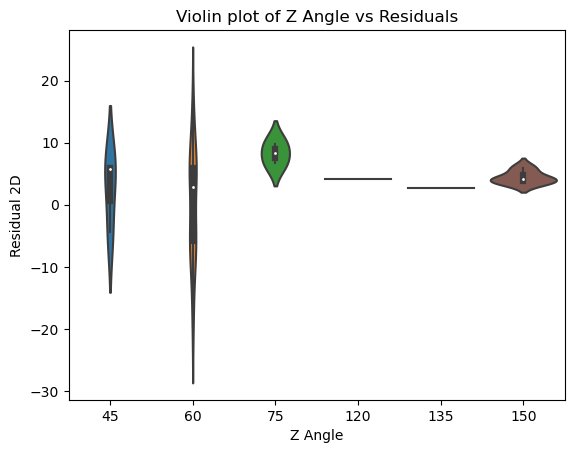

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is the DataFrame that contains your data.
# Make sure to load your data into `df` with the appropriate method, e.g., `pd.read_csv()` if it's from a CSV file.

# Now let's create the violin plot
sns.violinplot(x='z_angle', y='Residual_2d', data=all_outliers_df)

plt.title('Violin plot of Z Angle vs Residuals')
plt.xlabel('Z Angle')
plt.ylabel('Residual 2D')

plt.show()


In [70]:
#RESIDUES FOR THE ENTIRE DATA

In [71]:
# # ... [import statements and df_selected_orig definition] ...

# # Select features and target
# X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
# y = df_selected_orig['sq_2d_mm']

# # Initialize the Gradient Boosting Regressor
# gb_model = GradientBoostingRegressor(random_state=42)

# # Fit the model on the entire dataset (without dropping 'part')
# X_train = X.drop('part', axis=1)
# y_train = y
# gb_model.fit(X_train, y_train)

# # Predict on the entire dataset
# y_pred = gb_model.predict(X_train)

# # Append the predicted values to the original DataFrame
# df_selected_orig['Predicted_2d'] = y_pred


# # Calculate residuals
# residuals = y_train - y_pred

# # Append the residuals to the original DataFrame
# df_selected_orig['Residuals_2d'] = residuals

# relative_residuals = (df_selected_orig['sq_2d_mm'] - df_selected_orig['Predicted_2d']) / df_selected_orig['sq_2d_mm']
# df_selected_orig['Relative_Residual'] = relative_residuals


# # Now df_selected_orig contains the original data plus a 'Residuals' column
# df_selected_orig


In [72]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming `df` is the DataFrame that contains your data.
# # Make sure to load your data into `df` with the appropriate method, e.g., `pd.read_csv()` if it's from a CSV file.

# # Now let's create the violin plot
# sns.violinplot(x='z_angle', y='Relative_Residual', data=df_selected_orig)

# plt.title('Violin plot of Z Angle vs Relative_Residual')
# plt.xlabel('Z Angle')
# plt.ylabel('Relative_Residual 2D')

# plt.show()


In [73]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the Pearson correlation coefficients
# correlation_matrix = df_selected_orig.corr()

# # View the correlation with Residuals
# residual_correlations = correlation_matrix['Residuals_2d']

# # Alternatively, calculate Spearman rank correlation
# spearman_corr = df_selected_orig.corr(method='spearman')

# # Visualize the correlations using a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

# # For a more focused analysis on Residuals
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix[['Residuals_2d']], annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation with Residuals')
# plt.show()

# # Scatter plot of Residuals against another feature, for example, 'sq_x_mm'
# plt.figure(figsize=(8, 6))
# plt.scatter(df_selected_orig['sq_x_mm'], df_selected_orig['Residuals_2d'])
# plt.xlabel('sq_x_mm')
# plt.ylabel('Residuals_2d')
# plt.title('Scatter Plot of sq_x_mm vs Residuals_2d')
# plt.show()


In [74]:
# import numpy as np

# # Calculate the angle in radians
# df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])

# # Convert the angle to degrees
# df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# # Now df_selected_orig contains the original data plus the 'xy_angle_deg' column
# df_selected_orig["xy_angle_deg"] = df_selected_orig[['xy_angle_deg']]


In [75]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of features to plot
# features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# # Loop through each feature and create a violin plot
# for feature in features:
#     plt.figure(figsize=(8, 4))

#     # Round the feature values to 2 decimal places
#     rounded_feature = df_selected_orig[feature].round(2)

#     # Create the violin plot
#     sns.violinplot(x=rounded_feature, y=df_selected_orig['Residuals_2d'])

#     # Set the title and labels
#     plt.title(f'Residuals_2d vs {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Residuals_2d')
#     plt.grid(True)
#     plt.show()


In [76]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Calculate the angle in radians and convert to degrees
# df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])
# df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# # List of features to plot
# features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# # Set up the matplotlib figure in a 2x2 grid
# fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)  # Adjust the size as needed

# # Flatten the axes array for easy iteration
# axes_flat = axes.flatten()

# # Loop through each feature and create a violin plot on a subplot
# for i, feature in enumerate(features):
#     # Round the feature values to 2 decimal places for plotting
#     rounded_feature = df_selected_orig[feature].round(2)
    
#     # Create the violin plot on the ith subplot
#     sns.violinplot(ax=axes_flat[i], x=rounded_feature, y=df_selected_orig['Residuals_2d'])
    
#     # Set the title for the ith subplot
#     axes_flat[i].set_title(f'Residuals_2d vs {feature}')
#     axes_flat[i].set_xlabel(feature)
    
#     # Only add a y-label to the leftmost subplots
#     if i % 2 == 0:
#         axes_flat[i].set_ylabel('Residuals_2d')
#     else:
#         axes_flat[i].set_ylabel('')

# # Add an overall title and adjust the layout
# plt.suptitle('Distribution of Residuals Across Different Features', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as necessary for your figure
# plt.show()


# sq_x_mm

In [77]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
# y = df_selected['sq_x_mm']

# # Initialize the Gradient Boosting Regressor
# gb_model = GradientBoostingRegressor(random_state=42)

# mse_list = []
# r2_list = []
# part_list = df_selected['part'].unique()

# # Dictionary to store MSE and R^2 for each part
# results = {}

# # Loop through each unique part for cross-validation
# for part in part_list:
#     # Split the data into training and testing sets based on the part
#     X_train = X[X['part'] != part].drop('part', axis=1)
#     y_train = y[X['part'] != part]
    
#     X_test = X[X['part'] == part].drop('part', axis=1)
#     y_test = y[X['part'] == part]
    
#     # Train the Gradient Boosting Regressor
#     gb_model.fit(X_train, y_train)
    
#     # Predict on the testing set
#     y_pred_gb = gb_model.predict(X_test)
    
#     # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
#     mse_gb = mean_squared_error(y_test, y_pred_gb)
#     r2_gb = r2_score(y_test, y_pred_gb)
    
#     mse_list.append(mse_gb)
#     r2_list.append(r2_gb)
    
#     results[part] = {
#         'MSE': mse_gb,
#         'R2': r2_gb
#     }

# # Display MSE and R^2 for each part
# for part in part_list:
#     print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")


In [78]:
# import matplotlib.pyplot as plt

# # Modify the results dictionary to store actual and predicted values
# for part in part_list:
#     results[part]['Actual'] = y_test.tolist()
#     results[part]['Predicted'] = y_pred_gb.tolist()

# # Plotting actual vs predicted values for each part
# for part in part_list:
#     actual_values = results[part]['Actual']
#     predicted_values = results[part]['Predicted']

#     plt.figure(figsize=(8, 6))
#     plt.scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
#     plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
#     plt.title(f'Actual vs Predicted for Part {part}')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.grid(True)
#     plt.show()


In [79]:
# import matplotlib.pyplot as plt

# # Assuming 'results' is a dictionary with parts as keys and 'Actual' and 'Predicted' as sub-keys
# part_list = sorted(results.keys())  # Sort parts if necessary
# n_parts = len(part_list)
# n_cols = 3  # Number of columns in the subplot grid
# n_rows = n_parts // n_cols + (n_parts % n_cols > 0)  # Calculate the number of rows needed

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust the figure size as needed
# axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate over

# for i, part in enumerate(part_list):
#     actual_values = results[part]['Actual']
#     predicted_values = results[part]['Predicted']
#     min_val, max_val = min(actual_values + predicted_values), max(actual_values + predicted_values)
    
#     axes[i].scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
#     axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
#     axes[i].set_title(f'Actual vs Predicted for Part {part}')
#     axes[i].set_xlabel('Actual Values')
#     axes[i].set_ylabel('Predicted Values')
#     axes[i].grid(True)

# # If the number of parts is not a multiple of the number of columns, hide the extra subplots
# for j in range(i + 1, n_rows * n_cols):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()


In [80]:
# import numpy as np

# # Calculate residuals for each part
# for part in part_list:
#     results[part]['Residuals'] = np.array(results[part]['Actual']) - np.array(results[part]['Predicted'])

# # Find the index of the largest residual for each part
# largest_residual_indices = {}

# for part in part_list:
#     residuals = results[part]['Residuals']
#     largest_residual_index = np.argmax(np.abs(residuals))
#     largest_residual_indices[part] = largest_residual_index

# # Using the above index, retrieve the corresponding data row
# for part in part_list:
#     index = largest_residual_indices[part]
#     outlier_row = df_selected[X['part'] == part].iloc[index]
#     print(f"Outlier for Part {part}:")
#     print(outlier_row)
#     print('-'*50)


In [81]:
# import pandas as pd

# # Assuming df_selected is your original DataFrame
# # and the previous code for Gradient Boosting Regressor has been executed

# # Initialize an empty list to store residuals
# residuals_x = []

# # Loop through each unique part, calculate residuals, and append them to the residuals_y list
# for part in part_list:
#     # Retrieve actual and predicted values
#     actual_values = results[part]['Actual']
#     predicted_values = results[part]['Predicted']
    
#     # Calculate residuals for the current part
#     residuals_current_part = np.array(actual_values) - np.array(predicted_values)
    
#     # Append residuals to the residuals_x list
#     residuals_x.extend(residuals_current_part)

# # Add the residuals as a new column in the original DataFrame
# df_selected['residuals_x'] = residuals_x

# # Now, df_selected contains a new column 'residuals_x' with the residuals of the 'sq_y_mm' predictions
# df_selected

In [82]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming df is your DataFrame
# df_grouped = df_selected.groupby('z_angle')['residuals_x'].mean().reset_index()

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df_grouped, x="z_angle", y="residuals_x")
# plt.title("Line Plot of Average Residuals x vs Z Angle")
# plt.xlabel("Z Angle")
# plt.ylabel("Average Residuals in x")
# plt.show()


In [83]:
#outliers with sq_x_mm

In [84]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming df_selected is your DataFrame and has been defined earlier in your code

# X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
# y = df_selected_orig['sq_x_mm']

# # Initialize the Gradient Boosting Regressor
# gb_model = GradientBoostingRegressor(random_state=42)

# mse_list = []
# r2_list = []
# part_list = df_selected['part'].unique()

# # Dictionary to store results for each part
# results = {}

# # Loop through each unique part for cross-validation
# for part in part_list:
#     # Split the data into training and testing sets based on the part
#     X_train = X[X['part'] != part].drop('part', axis=1)
#     y_train = y[X['part'] != part]
    
#     X_test = X[X['part'] == part].drop('part', axis=1)
#     y_test = y[X['part'] == part]
    
#     # Train the Gradient Boosting Regressor
#     gb_model.fit(X_train, y_train)
    
#     # Predict on the testing set
#     y_pred_gb = gb_model.predict(X_test)
    
#     # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
#     mse_gb = mean_squared_error(y_test, y_pred_gb)
#     r2_gb = r2_score(y_test, y_pred_gb)
    
#     mse_list.append(mse_gb)
#     r2_list.append(r2_gb)
    
#     # Store results for MSE, R^2, Actual and Predicted values
#     results[part] = {
#         'MSE': mse_gb,
#         'R2': r2_gb,
#         'Actual': y_test.tolist(),
#         'Predicted': y_pred_gb.tolist()
#     }

# # Display MSE and R^2 for each part
# for part in part_list:
#     print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")

# # Define a threshold for considering a point as an outlier
# # For example, points beyond 1.5 times the interquartile range could be considered outliers
# outlier_dfs = {}  

# for part in part_list:
#     # Calculate residuals
#     actual_values = np.array(results[part]['Actual'])
#     predicted_values = np.array(results[part]['Predicted'])
#     residuals = actual_values - predicted_values

#     # Compute the interquartile range (IQR)
#     Q1 = np.percentile(residuals, 25)
#     Q3 = np.percentile(residuals, 75)
#     IQR = Q3 - Q1

#     # Detect outliers using the IQR method
#     outlier_mask = (residuals < Q1 - 1.5 * IQR) | (residuals > Q3 + 1.5 * IQR)
    
#     # Extract the outlier rows from the original DataFrame
#     outlier_indices = np.where(outlier_mask)[0]
#     outlier_data = df_selected_orig.loc[X[X['part'] == part].iloc[outlier_indices].index]
    
#     # Add the Predicted values and Residuals as new columns to the outlier DataFrame
#     outlier_data = outlier_data.assign(Predicted_2d=predicted_values[outlier_mask])
#     outlier_data = outlier_data.assign(Residual_2d=residuals[outlier_mask])
    
#     # Store the outlier DataFrame in the dictionary using the part as the key
#     outlier_dfs[part] = outlier_data


In [85]:
# all_outliers_df = pd.concat(outlier_dfs.values(), ignore_index=True)

# # This DataFrame now contains all the outliers from each part in a single DataFrame
# all_outliers_df

In [86]:
# # ... [import statements and df_selected_orig definition] ...

# # Select features and target
# X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
# y = df_selected_orig['sq_x_mm']

# # Initialize the Gradient Boosting Regressor
# gb_model = GradientBoostingRegressor(random_state=42)

# # Fit the model on the entire dataset (without dropping 'part')
# X_train = X.drop('part', axis=1)
# y_train = y
# gb_model.fit(X_train, y_train)

# # Predict on the entire dataset
# y_pred = gb_model.predict(X_train)

# # Append the predicted values to the original DataFrame
# df_selected_orig['Predicted_x'] = y_pred


# # Calculate residuals
# residuals = y_train - y_pred

# # Append the residuals to the original DataFrame
# df_selected_orig['Residuals_x'] = residuals

# relative_residuals = (df_selected_orig['sq_x_mm'] - df_selected_orig['Predicted_x']) / df_selected_orig['sq_x_mm']
# df_selected_orig['Relative_Residual'] = relative_residuals


# # Now df_selected_orig contains the original data plus a 'Residuals' column
# df_selected_orig


In [87]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the Pearson correlation coefficients
# correlation_matrix = df_selected_orig.corr()

# # View the correlation with Residuals
# residual_correlations = correlation_matrix['Residuals_x']

# # Alternatively, calculate Spearman rank correlation
# spearman_corr = df_selected_orig.corr(method='spearman')

# # Visualize the correlations using a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

# # For a more focused analysis on Residuals
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix[['Residuals_x']], annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation with Residuals')
# plt.show()

# # Scatter plot of Residuals against another feature, for example, 'sq_x_mm'
# plt.figure(figsize=(8, 6))
# plt.scatter(df_selected_orig['sq_x_mm'], df_selected_orig['Residuals_x'])
# plt.xlabel('sq_x_mm')
# plt.ylabel('Residuals_x')
# plt.title('Scatter Plot of sq_x_mm vs Residuals_x')
# plt.show()


In [88]:
# import numpy as np

# # Calculate the angle in radians
# df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])

# # Convert the angle to degrees
# df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# # Now df_selected_orig contains the original data plus the 'xy_angle_deg' column
# df_selected_orig["xy_angle_deg"] = df_selected_orig[['xy_angle_deg']]


In [89]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of features to plot
# features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# # Loop through each feature and create a violin plot
# for feature in features:
#     plt.figure(figsize=(8, 4))

#     # Round the feature values to 2 decimal places
#     rounded_feature = df_selected_orig[feature].round(2)

#     # Create the violin plot
#     sns.violinplot(x=rounded_feature, y=df_selected_orig['Residuals_x'])

#     # Set the title and labels
#     plt.title(f'Residuals_x vs {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Residuals_x')
#     plt.grid(True)
#     plt.show()


In [90]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Calculate the angle in radians and convert to degrees
# df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])
# df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# # List of features to plot
# features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# # Set up the matplotlib figure in a 2x2 grid
# fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)  # Adjust the size as needed

# # Flatten the axes array for easy iteration
# axes_flat = axes.flatten()

# # Loop through each feature and create a violin plot on a subplot
# for i, feature in enumerate(features):
#     # Round the feature values to 2 decimal places for plotting
#     rounded_feature = df_selected_orig[feature].round(2)
    
#     # Create the violin plot on the ith subplot
#     sns.violinplot(ax=axes_flat[i], x=rounded_feature, y=df_selected_orig['Residuals_x'])
    
#     # Set the title for the ith subplot
#     axes_flat[i].set_title(f'Residuals_x vs {feature}')
#     axes_flat[i].set_xlabel(feature)
    
#     # Only add a y-label to the leftmost subplots
#     if i % 2 == 0:
#         axes_flat[i].set_ylabel('Residuals_x')
#     else:
#         axes_flat[i].set_ylabel('')

# # Add an overall title and adjust the layout
# plt.suptitle('Distribution of Residuals Across Different Features', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as necessary for your figure
# plt.show()


# sq_y_mm

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected['sq_y_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []
part_list = df_selected['part'].unique()

# Dictionary to store MSE and R^2 for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)
    
    results[part] = {
        'MSE': mse_gb,
        'R2': r2_gb
    }

# Display MSE and R^2 for each part
for part in part_list:
    print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")


Part 1: MSE = 7.621, R^2 = 0.955
Part 2: MSE = 5.745, R^2 = 0.965
Part 3: MSE = 7.281, R^2 = 0.951
Part 4: MSE = 2.468, R^2 = 0.986
Part 5: MSE = 1.553, R^2 = 0.991
Part 6: MSE = 3.402, R^2 = 0.977
Part 7: MSE = 2.654, R^2 = 0.985
Part 8: MSE = 4.231, R^2 = 0.977
Part 9: MSE = 7.632, R^2 = 0.954


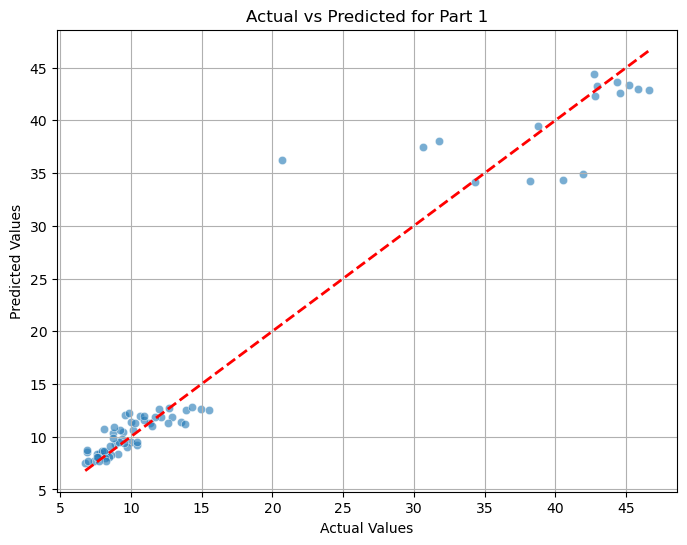

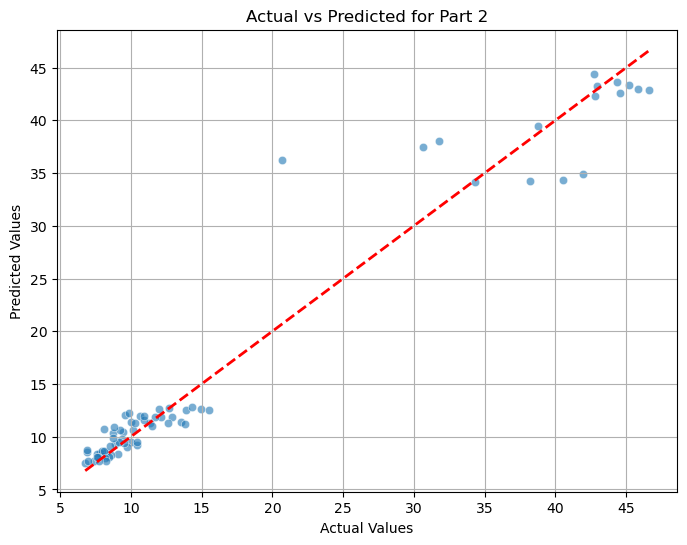

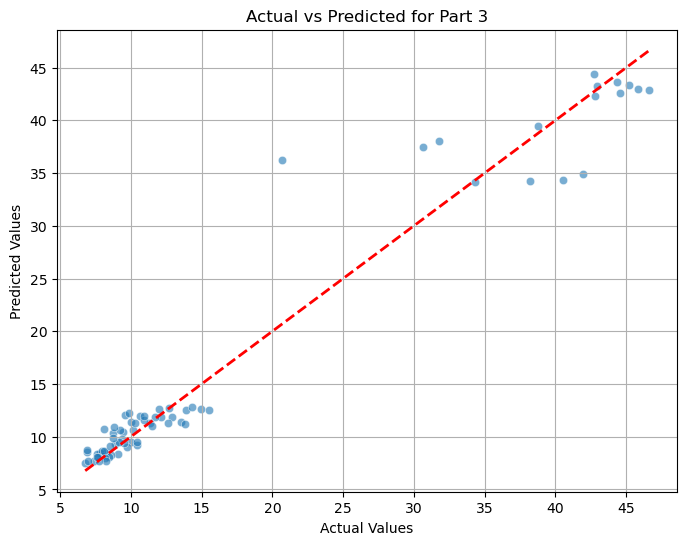

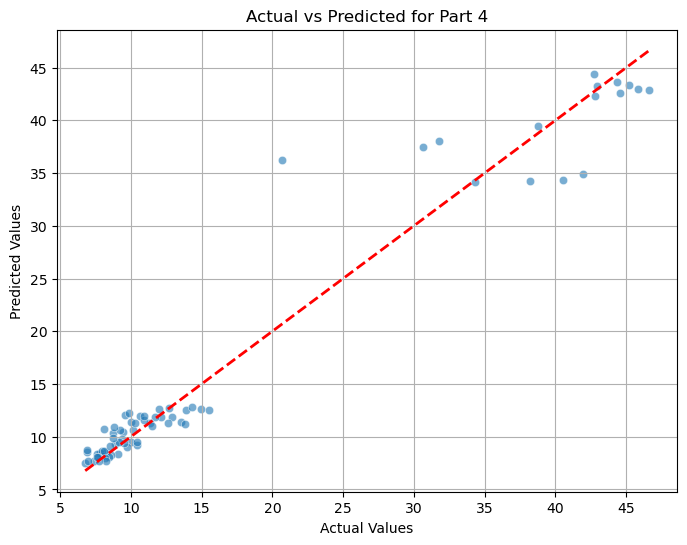

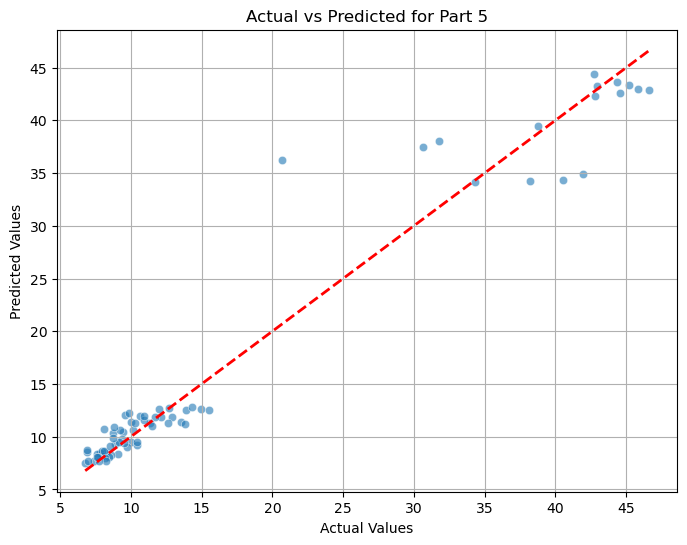

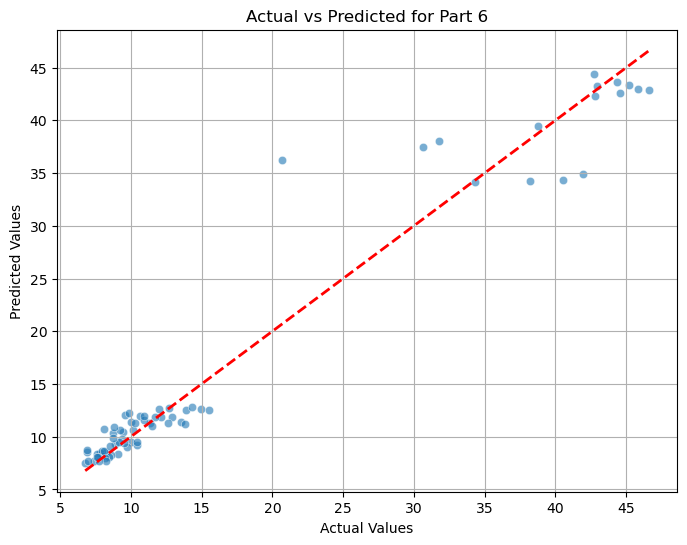

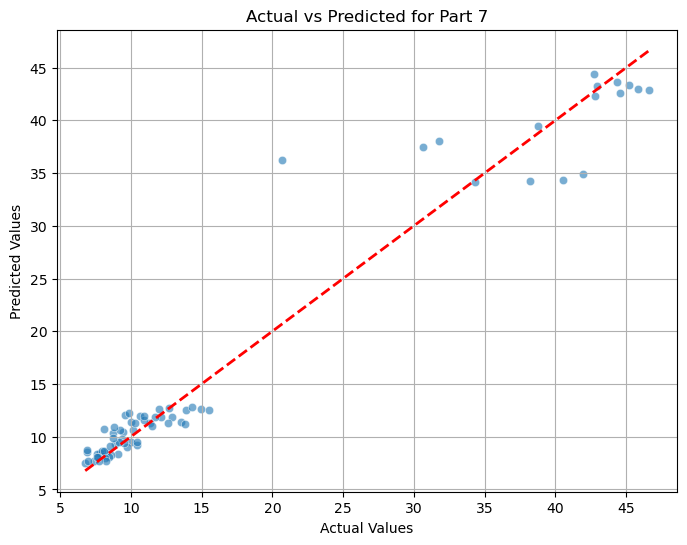

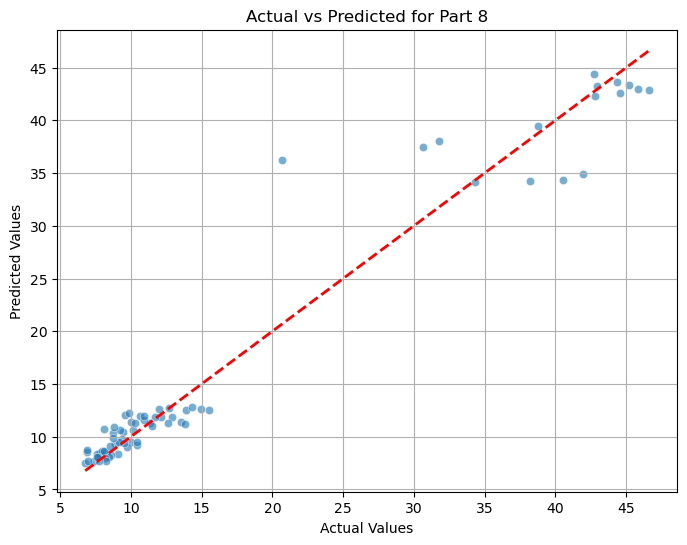

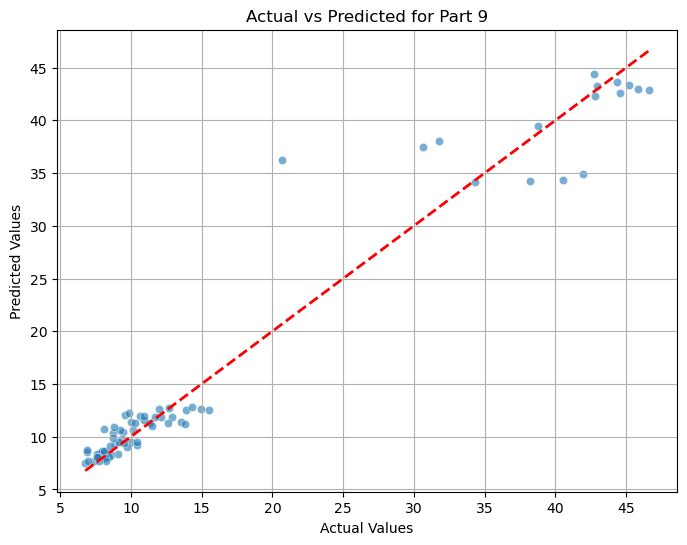

In [92]:
import matplotlib.pyplot as plt

# Modify the results dictionary to store actual and predicted values
for part in part_list:
    results[part]['Actual'] = y_test.tolist()
    results[part]['Predicted'] = y_pred_gb.tolist()

# Plotting actual vs predicted values for each part
for part in part_list:
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Part {part}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()


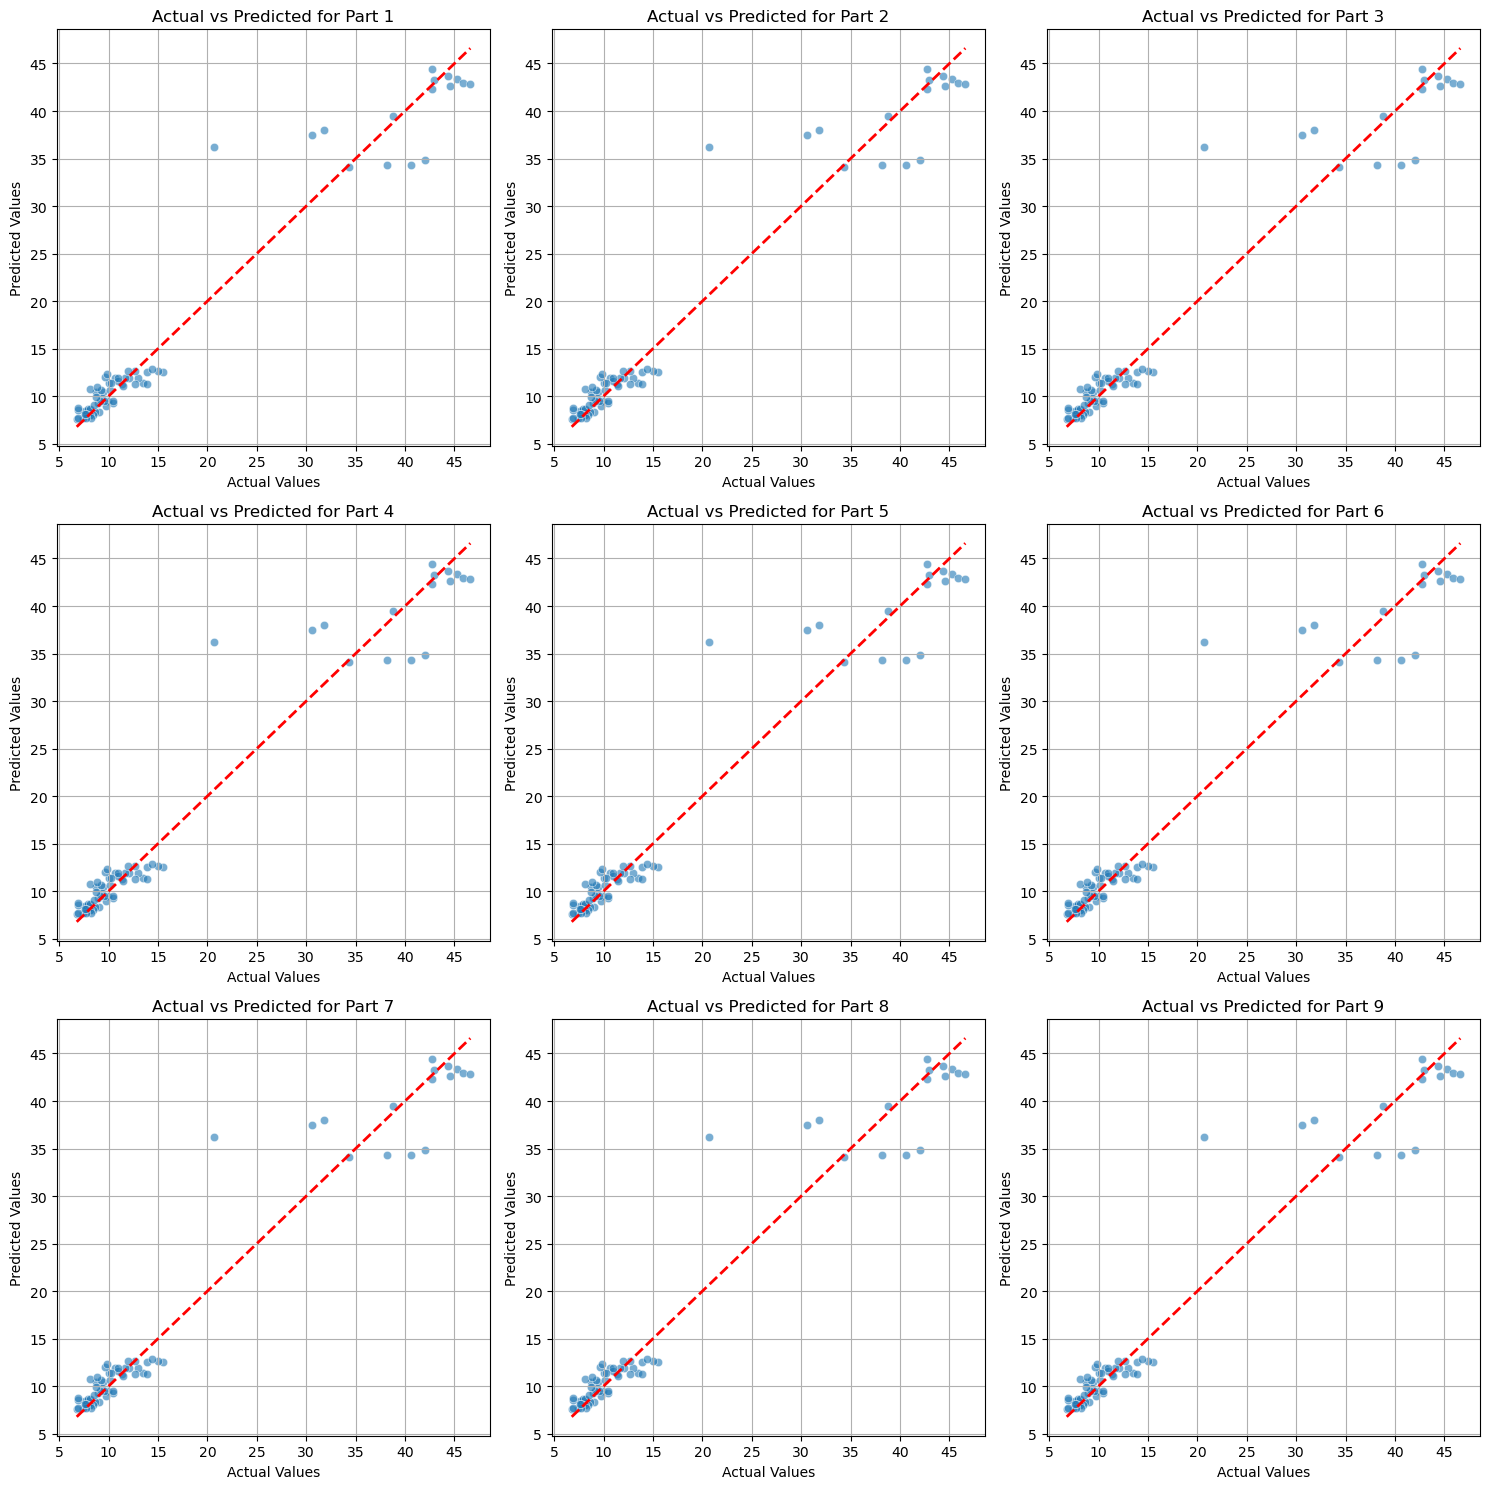

In [93]:
import matplotlib.pyplot as plt

# Assuming 'results' is a dictionary with parts as keys and 'Actual' and 'Predicted' as sub-keys
part_list = sorted(results.keys())  # Sort parts if necessary
n_parts = len(part_list)
n_cols = 3  # Number of columns in the subplot grid
n_rows = n_parts // n_cols + (n_parts % n_cols > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate over

for i, part in enumerate(part_list):
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    min_val, max_val = min(actual_values + predicted_values), max(actual_values + predicted_values)
    
    axes[i].scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[i].set_title(f'Actual vs Predicted for Part {part}')
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].grid(True)

# If the number of parts is not a multiple of the number of columns, hide the extra subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [94]:
import numpy as np

# Calculate residuals for each part
for part in part_list:
    results[part]['Residuals'] = np.array(results[part]['Actual']) - np.array(results[part]['Predicted'])

# Find the index of the largest residual for each part
largest_residual_indices = {}

for part in part_list:
    residuals = results[part]['Residuals']
    largest_residual_index = np.argmax(np.abs(residuals))
    largest_residual_indices[part] = largest_residual_index

# Using the above index, retrieve the corresponding data row
for part in part_list:
    index = largest_residual_indices[part]
    outlier_row = df_selected[X['part'] == part].iloc[index]
    print(f"Outlier for Part {part}:")
    print(outlier_row)
    print('-'*50)


Outlier for Part 1:
part              1.000000
x               -75.000000
y                75.000000
z_angle          60.000000
x_y_angle_sin     0.000000
x_y_angle_cos     1.000000
sq_x_mm          44.708439
sq_y_mm          43.391598
sq_2d_mm         48.443910
residuals_2d      1.823652
Name: 7, dtype: float64
--------------------------------------------------
Outlier for Part 2:
part              2.000000
x                 0.000000
y                75.000000
z_angle          60.000000
x_y_angle_sin     0.000000
x_y_angle_cos     1.000000
sq_x_mm          44.303268
sq_y_mm          38.888654
sq_2d_mm         47.677495
residuals_2d      0.662200
Name: 79, dtype: float64
--------------------------------------------------
Outlier for Part 3:
part              3.000000
x                75.000000
y                75.000000
z_angle          60.000000
x_y_angle_sin     0.000000
x_y_angle_cos     1.000000
sq_x_mm          49.301277
sq_y_mm          45.462329
sq_2d_mm         51.823711
residu

In [95]:
import pandas as pd

# Assuming df_selected is your original DataFrame
# and the previous code for Gradient Boosting Regressor has been executed

# Initialize an empty list to store residuals
residuals_y = []

# Loop through each unique part, calculate residuals, and append them to the residuals_y list
for part in part_list:
    # Retrieve actual and predicted values
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    
    # Calculate residuals for the current part
    residuals_current_part = np.array(actual_values) - np.array(predicted_values)
    
    # Append residuals to the residuals_y list
    residuals_y.extend(residuals_current_part)

# Add the residuals as a new column in the original DataFrame
df_selected['residuals_y'] = residuals_y

# Now, df_selected contains a new column 'residuals_y' with the residuals of the 'sq_y_mm' predictions
df_selected

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,residuals_2d,residuals_y
0,1,-75,75,165,0.000000,1.000000,14.303308,11.139786,16.331449,-0.213434,0.211200
1,1,-75,75,150,0.000000,1.000000,11.925943,10.973038,13.834006,-1.545801,3.000533
2,1,-75,75,135,0.000000,1.000000,11.950379,11.458671,13.309392,0.132690,2.080880
3,1,-75,75,120,0.000000,1.000000,10.053210,9.503831,10.536805,-0.536063,0.524999
4,1,-75,75,105,0.000000,1.000000,10.007268,9.359134,10.356003,0.107586,0.698805
...,...,...,...,...,...,...,...,...,...,...,...
643,9,75,-75,105,-0.707107,0.707107,8.367722,7.708147,8.839090,-0.693128,-0.361734
644,9,75,-75,90,-0.707107,0.707107,7.963393,7.578396,8.352485,-1.161477,-0.509054
645,9,75,-75,75,-0.707107,0.707107,8.910831,8.756021,10.846057,-1.172459,-1.115845
646,9,75,-75,60,-0.707107,0.707107,39.928397,34.320573,42.103473,-0.556418,0.187035


/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


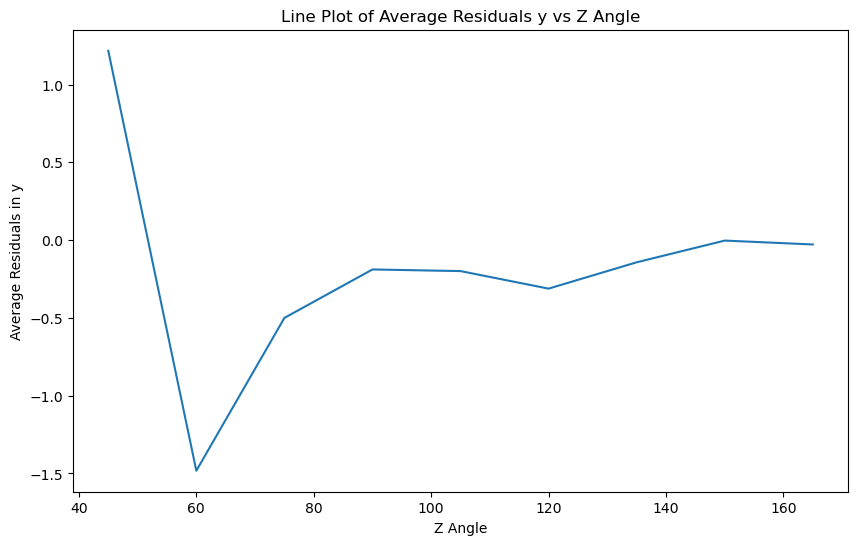

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df_grouped = df_selected.groupby('z_angle')['residuals_y'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="z_angle", y="residuals_y")
plt.title("Line Plot of Average Residuals y vs Z Angle")
plt.xlabel("Z Angle")
plt.ylabel("Average Residuals in y")
plt.show()


In [97]:
# with outliers on sq_y_mm

In [98]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_selected is your DataFrame and has been defined earlier in your code

X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected_orig['sq_y_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

mse_list = []
r2_list = []
part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    mse_list.append(mse_gb)
    r2_list.append(r2_gb)
    
    # Store results for MSE, R^2, Actual and Predicted values
    results[part] = {
        'MSE': mse_gb,
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist()
    }

# Display MSE and R^2 for each part
for part in part_list:
    print(f"Part {part}: MSE = {results[part]['MSE']:.3f}, R^2 = {results[part]['R2']:.3f}")

# Define a threshold for considering a point as an outlier
# For example, points beyond 1.5 times the interquartile range could be considered outliers
outlier_dfs = {}  

for part in part_list:
    # Calculate residuals
    actual_values = np.array(results[part]['Actual'])
    predicted_values = np.array(results[part]['Predicted'])
    residuals = actual_values - predicted_values

    # Compute the interquartile range (IQR)
    Q1 = np.percentile(residuals, 25)
    Q3 = np.percentile(residuals, 75)
    IQR = Q3 - Q1

    # Detect outliers using the IQR method
    outlier_mask = (residuals < Q1 - 1.5 * IQR) | (residuals > Q3 + 1.5 * IQR)
    
    # Extract the outlier rows from the original DataFrame
    outlier_indices = np.where(outlier_mask)[0]
    outlier_data = df_selected_orig.loc[X[X['part'] == part].iloc[outlier_indices].index]
    
    # Add the Predicted values and Residuals as new columns to the outlier DataFrame
    outlier_data = outlier_data.assign(Predicted_2d=predicted_values[outlier_mask])
    outlier_data = outlier_data.assign(Residual_2d=residuals[outlier_mask])
    
    # Store the outlier DataFrame in the dictionary using the part as the key
    outlier_dfs[part] = outlier_data


Part 1: MSE = 7.621, R^2 = 0.955
Part 2: MSE = 5.745, R^2 = 0.965
Part 3: MSE = 7.281, R^2 = 0.951
Part 4: MSE = 2.468, R^2 = 0.986
Part 5: MSE = 1.553, R^2 = 0.991
Part 6: MSE = 3.402, R^2 = 0.977
Part 7: MSE = 2.654, R^2 = 0.985
Part 8: MSE = 4.231, R^2 = 0.977
Part 9: MSE = 7.632, R^2 = 0.954


In [99]:
all_outliers_df = pd.concat(outlier_dfs.values(), ignore_index=True)

# This DataFrame now contains all the outliers from each part in a single DataFrame
all_outliers_df

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,Predicted_2d,Residual_2d
0,1,-75,75,60,0.000000e+00,1.000000e+00,44.708439,43.391598,48.443910,37.697362,5.694236
1,1,-75,75,105,7.071068e-01,7.071068e-01,13.797670,13.079376,14.786074,8.476307,4.603069
2,1,-75,75,75,7.071068e-01,7.071068e-01,18.366164,17.809138,19.759955,11.523531,6.285607
3,1,-75,75,60,7.071068e-01,7.071068e-01,49.169932,45.319334,52.389402,39.986002,5.333333
4,1,-75,75,60,1.000000e+00,6.123234e-17,53.622118,51.371050,57.324568,40.232236,11.138814
5,1,-75,75,60,-7.071068e-01,-7.071068e-01,33.506447,29.485875,35.919426,35.945224,-6.459349
6,1,-75,75,60,-1.000000e+00,-1.836970e-16,28.137140,24.777217,31.930096,36.338516,-11.561299
7,1,-75,75,60,-7.071068e-01,7.071068e-01,36.832878,32.942349,38.515694,36.669510,-3.727161
8,2,0,75,45,7.071068e-01,7.071068e-01,47.770778,47.368873,49.624454,44.492503,2.876370
9,2,0,75,60,1.000000e+00,6.123234e-17,30.533307,28.069863,33.592723,41.535911,-13.466048


In [100]:
# ... [import statements and df_selected_orig definition] ...

# Select features and target
X = df_selected_orig[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle']]
y = df_selected_orig['sq_y_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the entire dataset (without dropping 'part')
X_train = X.drop('part', axis=1)
y_train = y
gb_model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred = gb_model.predict(X_train)

# Append the predicted values to the original DataFrame
df_selected_orig['Predicted_y'] = y_pred


# Calculate residuals
residuals = y_train - y_pred

# Append the residuals to the original DataFrame
df_selected_orig['Residuals_y'] = residuals

relative_residuals = (df_selected_orig['sq_y_mm'] - df_selected_orig['Predicted_y']) / df_selected_orig['sq_y_mm']
df_selected_orig['Relative_Residual'] = relative_residuals


# Now df_selected_orig contains the original data plus a 'Residuals' column
df_selected_orig


,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,Predicted_y,Residuals_y,Relative_Residual
0,1,-75,75,165,0.000000,1.000000,14.303308,11.139786,16.331449,11.603616,-0.463830,-0.041637
1,1,-75,75,150,0.000000,1.000000,11.925943,10.973038,13.834006,12.083136,-1.110098,-0.101166
2,1,-75,75,135,0.000000,1.000000,11.950379,11.458671,13.309392,11.622657,-0.163986,-0.014311
3,1,-75,75,120,0.000000,1.000000,10.053210,9.503831,10.536805,10.420509,-0.916678,-0.096454
4,1,-75,75,105,0.000000,1.000000,10.007268,9.359134,10.356003,9.930533,-0.571398,-0.061052
...,...,...,...,...,...,...,...,...,...,...,...,...
643,9,75,-75,105,-0.707107,0.707107,8.367722,7.708147,8.839090,7.628846,0.079302,0.010288
644,9,75,-75,90,-0.707107,0.707107,7.963393,7.578396,8.352485,7.729047,-0.150651,-0.019879
645,9,75,-75,75,-0.707107,0.707107,8.910831,8.756021,10.846057,9.593439,-0.837417,-0.095639
646,9,75,-75,60,-0.707107,0.707107,39.928397,34.320573,42.103473,33.890027,0.430546,0.012545


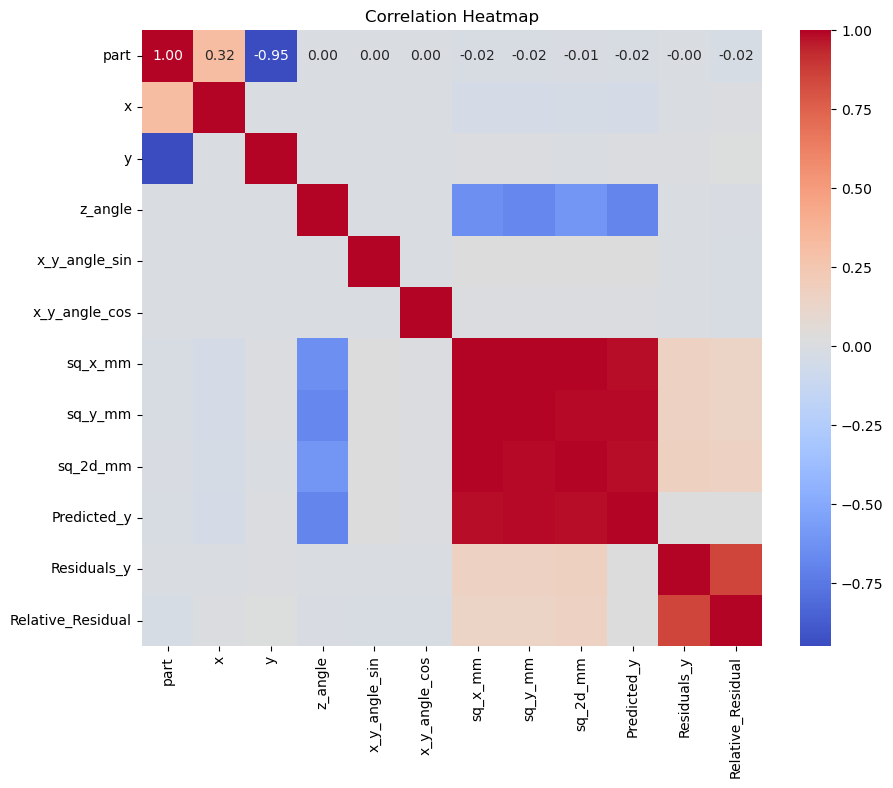

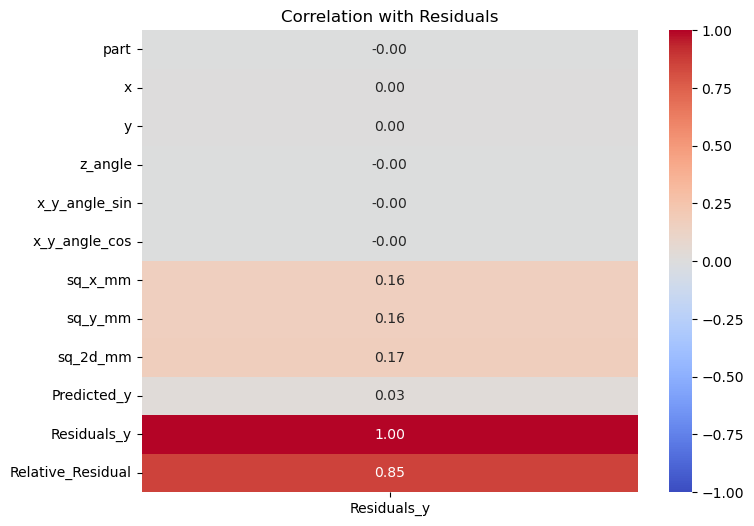

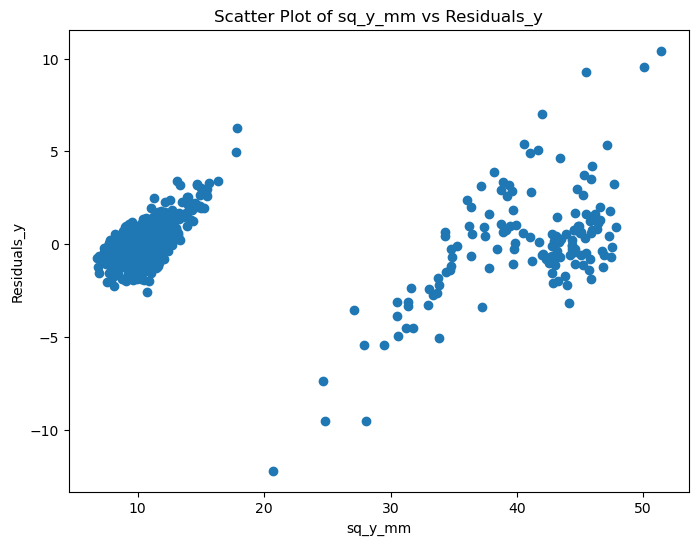

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation coefficients
correlation_matrix = df_selected_orig.corr()

# View the correlation with Residuals
residual_correlations = correlation_matrix['Residuals_y']

# Alternatively, calculate Spearman rank correlation
spearman_corr = df_selected_orig.corr(method='spearman')

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# For a more focused analysis on Residuals
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Residuals_y']], annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Residuals')
plt.show()

# Scatter plot of Residuals against another feature, for example, 'sq_x_mm'
plt.figure(figsize=(8, 6))
plt.scatter(df_selected_orig['sq_y_mm'], df_selected_orig['Residuals_y'])
plt.xlabel('sq_y_mm')
plt.ylabel('Residuals_y')
plt.title('Scatter Plot of sq_y_mm vs Residuals_y')
plt.show()


In [102]:
import numpy as np

# Calculate the angle in radians
df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])

# Convert the angle to degrees
df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# Now df_selected_orig contains the original data plus the 'xy_angle_deg' column
df_selected_orig["xy_angle_deg"] = df_selected_orig[['xy_angle_deg']]


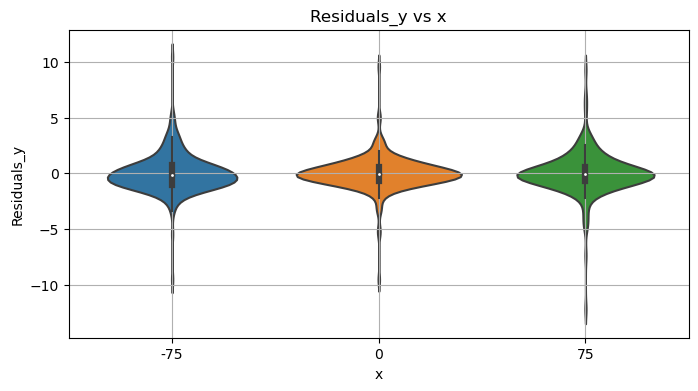

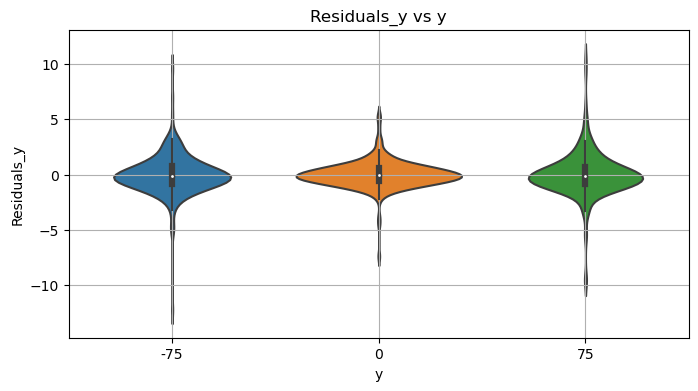

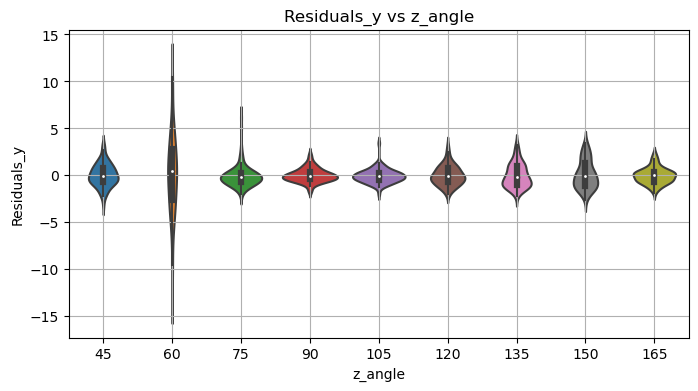

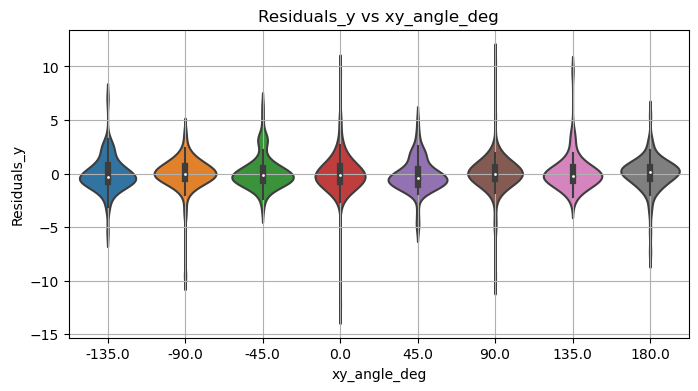

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# Loop through each feature and create a violin plot
for feature in features:
    plt.figure(figsize=(8, 4))

    # Round the feature values to 2 decimal places
    rounded_feature = df_selected_orig[feature].round(2)

    # Create the violin plot
    sns.violinplot(x=rounded_feature, y=df_selected_orig['Residuals_y'])

    # Set the title and labels
    plt.title(f'Residuals_y vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals_y')
    plt.grid(True)
    plt.show()


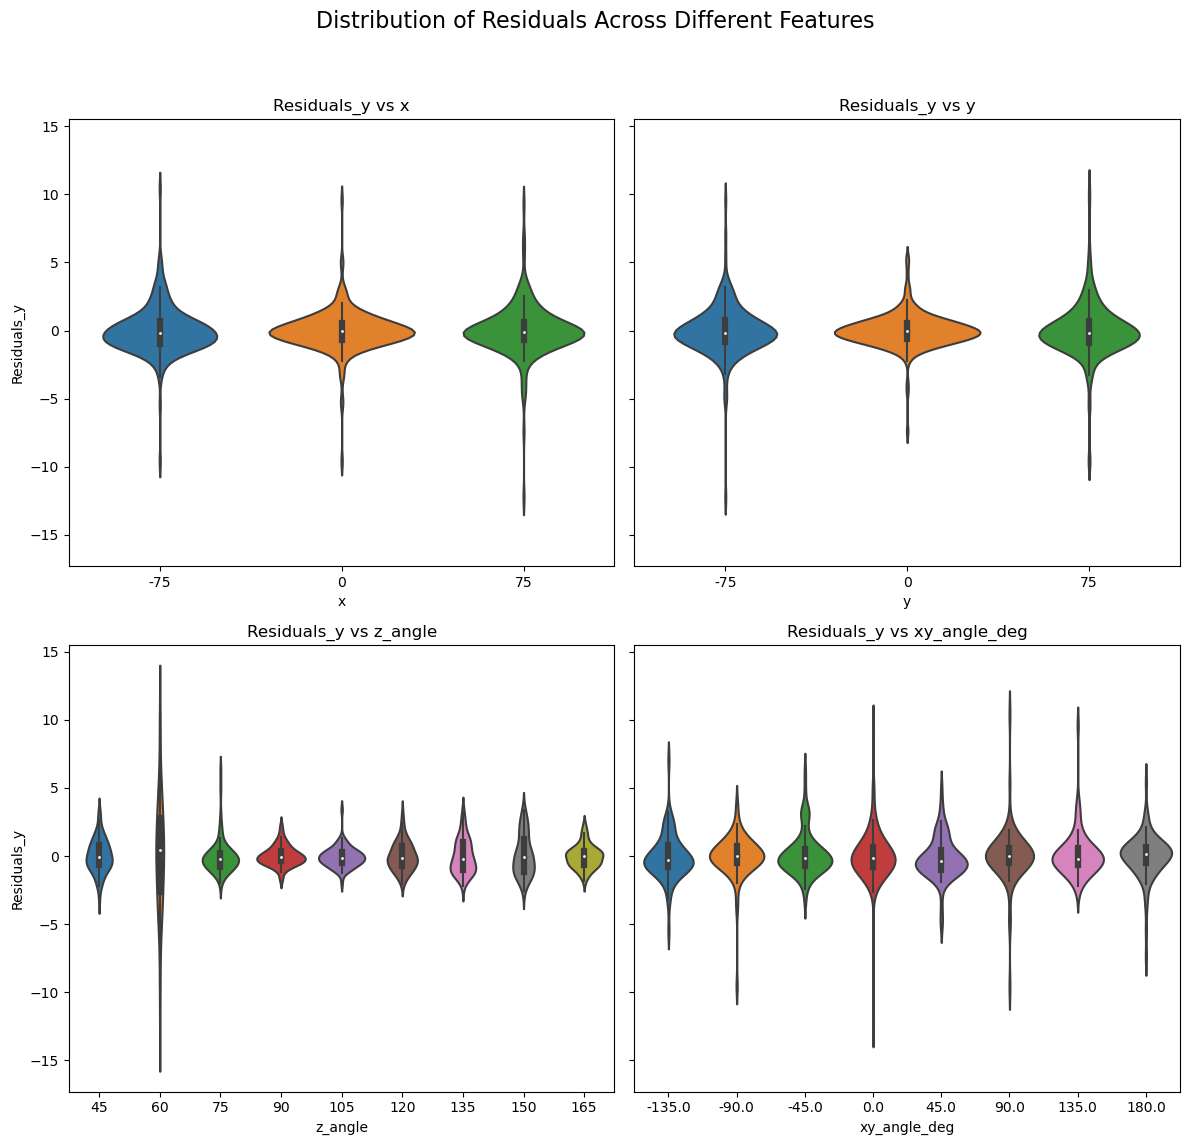

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the angle in radians and convert to degrees
df_selected_orig['xy_angle_rad'] = np.arctan2(df_selected_orig['x_y_angle_sin'], df_selected_orig['x_y_angle_cos'])
df_selected_orig['xy_angle_deg'] = np.degrees(df_selected_orig['xy_angle_rad'])

# List of features to plot
features = ['x', 'y', 'z_angle', 'xy_angle_deg']

# Set up the matplotlib figure in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Loop through each feature and create a violin plot on a subplot
for i, feature in enumerate(features):
    # Round the feature values to 2 decimal places for plotting
    rounded_feature = df_selected_orig[feature].round(2)
    
    # Create the violin plot on the ith subplot
    sns.violinplot(ax=axes_flat[i], x=rounded_feature, y=df_selected_orig['Residuals_y'])
    
    # Set the title for the ith subplot
    axes_flat[i].set_title(f'Residuals_y vs {feature}')
    axes_flat[i].set_xlabel(feature)
    
    # Only add a y-label to the leftmost subplots
    if i % 2 == 0:
        axes_flat[i].set_ylabel('Residuals_y')
    else:
        axes_flat[i].set_ylabel('')

# Add an overall title and adjust the layout
plt.suptitle('Distribution of Residuals Across Different Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as necessary for your figure
plt.show()


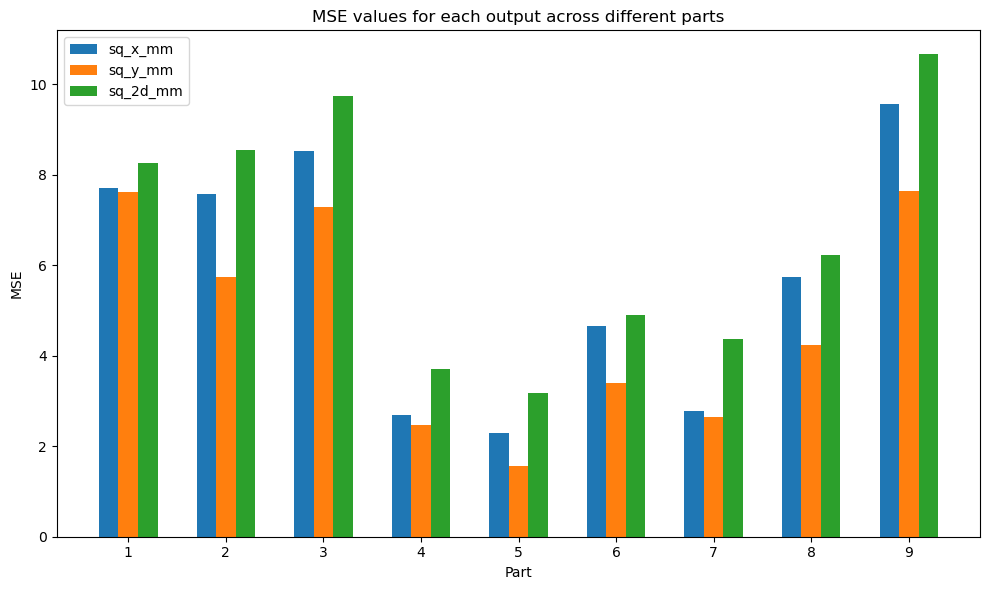

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
parts = np.arange(1, 10)

mse_sq_x_mm = [7.701, 7.567, 8.531, 2.690, 2.298, 4.663, 2.781, 5.750, 9.565]
mse_sq_y_mm = [7.621, 5.745, 7.281, 2.468, 1.553, 3.402, 2.654, 4.231, 7.632]
mse_sq_2d_mm = [8.263, 8.538, 9.749, 3.712, 3.186, 4.902, 4.370, 6.226, 10.660]

# Plotting MSE values
plt.figure(figsize=(10, 6))
plt.bar(parts - 0.2, mse_sq_x_mm, width=0.2, label='sq_x_mm', align='center')
plt.bar(parts, mse_sq_y_mm, width=0.2, label='sq_y_mm', align='center')
plt.bar(parts + 0.2, mse_sq_2d_mm, width=0.2, label='sq_2d_mm', align='center')

# Adding title and labels
plt.title('MSE values for each output across different parts')
plt.xlabel('Part')
plt.ylabel('MSE')
plt.xticks(parts)
plt.legend()
plt.tight_layout()
plt.show()




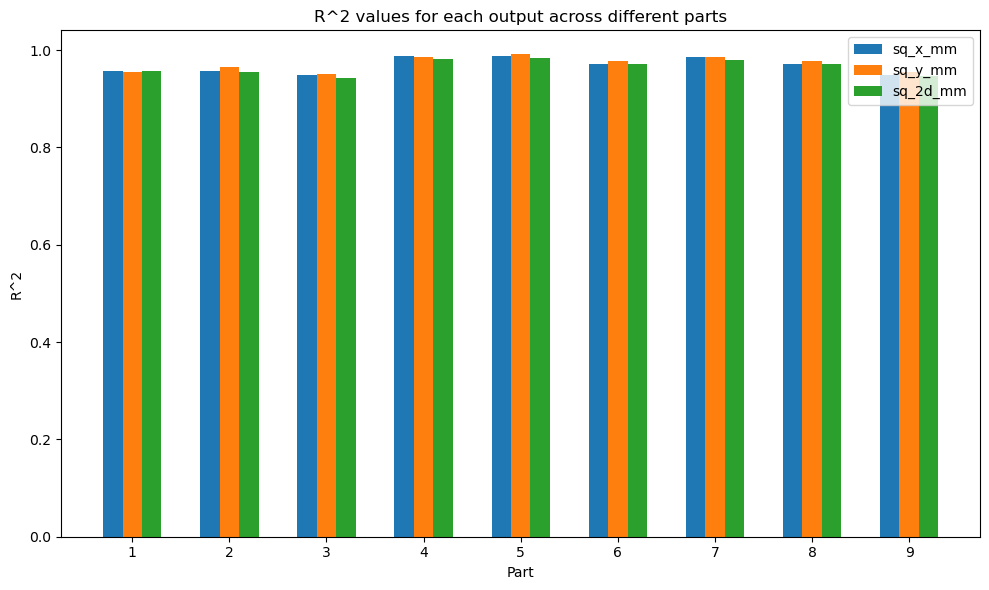

In [106]:
# R^2 data
r2_sq_x_mm = [0.957, 0.958, 0.948, 0.987, 0.988, 0.972, 0.986, 0.972, 0.948]
r2_sq_y_mm = [0.955, 0.965, 0.951, 0.986, 0.991, 0.977, 0.985, 0.977, 0.954]
r2_sq_2d_mm = [0.957, 0.955, 0.943, 0.982, 0.984, 0.972, 0.979, 0.972, 0.946]

# Plotting R^2 values
plt.figure(figsize=(10, 6))
plt.bar(parts - 0.2, r2_sq_x_mm, width=0.2, label='sq_x_mm', align='center')
plt.bar(parts, r2_sq_y_mm, width=0.2, label='sq_y_mm', align='center')
plt.bar(parts + 0.2, r2_sq_2d_mm, width=0.2, label='sq_2d_mm', align='center')

# Adding title and labels
plt.title('R^2 values for each output across different parts')
plt.xlabel('Part')
plt.ylabel('R^2')
plt.xticks(parts)
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
df_selected

,part,x,y,z_angle,x_y_angle_sin,x_y_angle_cos,sq_x_mm,sq_y_mm,sq_2d_mm,residuals_2d,residuals_y
0,1,-75,75,165,0.000000,1.000000,14.303308,11.139786,16.331449,-0.213434,0.211200
1,1,-75,75,150,0.000000,1.000000,11.925943,10.973038,13.834006,-1.545801,3.000533
2,1,-75,75,135,0.000000,1.000000,11.950379,11.458671,13.309392,0.132690,2.080880
3,1,-75,75,120,0.000000,1.000000,10.053210,9.503831,10.536805,-0.536063,0.524999
4,1,-75,75,105,0.000000,1.000000,10.007268,9.359134,10.356003,0.107586,0.698805
...,...,...,...,...,...,...,...,...,...,...,...
643,9,75,-75,105,-0.707107,0.707107,8.367722,7.708147,8.839090,-0.693128,-0.361734
644,9,75,-75,90,-0.707107,0.707107,7.963393,7.578396,8.352485,-1.161477,-0.509054
645,9,75,-75,75,-0.707107,0.707107,8.910831,8.756021,10.846057,-1.172459,-1.115845
646,9,75,-75,60,-0.707107,0.707107,39.928397,34.320573,42.103473,-0.556418,0.187035
